# Tourist Parents Project

### 1. A description of the problem and a discussion of the background. 

##### My parents want to travel around South America, mainly to Colombia, Peru, Brazil, Bolivia and Argentina, they want to go to the 10 best Museums to visit, they want to organize their trip but they don't know how to do it.

### 2. A description of the data and how it will be used to solve the problem.

##### I will use foursquare to find the 10 best museums to visit according to the tourists' scores, compare these values and decide which country to start your vacation with. I will relate the data of these places, transport facilities, restaurants near them, pharmacies, etc.

## Import Necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22' # your Foursquare ID
CLIENT_SECRET = 'K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22
CLIENT_SECRET:K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV


## So let's start by converting the Bogota-Colombia address to its latitude and longitude coordinates.

#### In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below

In [3]:
address = 'Bogota, Colombia'
#address = 'Colombia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

4.59808 -74.0760439


## Search for Museum places category

In [4]:
search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

 

Museo .... OK!


### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22&client_secret=K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV&ll=4.59808,-74.0760439&v=20180604&query=Museo&radius=900000&limit=30'

## Send the GET Request and examine the results

In [6]:
results = requests.get(url).json()


### Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues

venues = results['response']['venues']
#print(results['response']['venues'].keys())


In [9]:
#venues[9]

In [8]:
# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos = pd.DataFrame(columns=column_names)



In [9]:
Museos

Empty DataFrame
Columns: [Id, Museo, Address, Latitude, Longitude]
Index: []

##### museum data with address, latitude and longitude

In [10]:
for data in venues:
    Ids = data['id'] 
    museo = data['name'] 
        
    location_lat = data['location']['lat']
    location_lng = data['location']['lng']
 
    location_Add = data['location']['formattedAddress']    
    location_address = location_Add [0]
    
    
    Museos = Museos.append({'Museo':museo,
                            'Id':Ids,
                            'Address': location_address,
                            'Latitude': location_lat,
                            'Longitude': location_lng}, ignore_index=True)

In [11]:
print("Shape: ", Museos.shape)
Museos.head(1)

Shape:  (30, 5)


Id                                   Museo  \
0  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   

                          Address  Latitude  Longitude  
0  Kr 9 #9-28 (Calle 9 Avenida 9)  4.597853  -74.07858

##### Using the Search API, let us search for museums in Bogota into a pandas dataframe.

##### Eliminate non-museum places in Bogota

In [12]:
Museos_Bta = Museos.drop([7, 21], axis =0)
print("Shape: ", Museos_Bta.shape)
Museos_Bta.head(1)


Shape:  (28, 5)


Id                                   Museo  \
0  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   

                          Address  Latitude  Longitude  
0  Kr 9 #9-28 (Calle 9 Avenida 9)  4.597853  -74.07858

In [13]:
 # import library to handle requests
import requests

# create a pandas dataframe 
df_Bta_Museos = pd.DataFrame(columns = ['Museo_Id', 'Museo_Bta', 'Museo_Address', 'Museo_Bta_Lat', 'Museo_Bta_Long','Museo_name', 
                                        'Museo_city', 'Museo_Address', 'Museo_Latitude', 'Museo_Longitude', 'Museo_Category',
                                       'Museum_Venue_id'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the museum data
for index, row in Museos_Bta.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the Museums
    for i in range(0,len(results['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name = results['response']['venues'][i]['name']
        
        try:
            Museum_city = results['response']['venues'][i]['location']['city']
        except:
            Museum_city = ''
            
        Museum_address = results['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude = results['response']['venues'][i]['location']['lat']
        Museum_longitude = results['response']['venues'][i]['location']['lng']
        Museum_Venue_id = results['response']['venues'][i]['id']
        

 # Check to see if the museum has any categories
        if (len(results['response']['venues'][i]['categories']) > 0):
            Museum_category = results['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category = ''
        
        # Add the data row to the Museum dataframe
        df_Bta_Museos = df_Bta_Museos.append({'Museo_Id' : Id,
                                              'Museo_Bta' : Museo, 
                                              'Museo_Address' : Museo_Add, 
                                              'Museo_Bta_Lat' : LATITUDE, 
                                              'Museo_Bta_Long' : LONGITUDE,  
                                              'Museo_name' : Museum_name,
                                              'Museo_city' : Museum_city, 
                                              'Museo_Address' : Museum_address,
                                              'Museo_Latitude' : Museum_latitude,
                                              'Museo_Longitude' : Museum_longitude, 
                                              'Museo_Category' : Museum_category,
                                               'Museum_Venue_id' : Museum_Venue_id}, ignore_index=True)

# Print the first 10 rows of the museums dataframe
df_Bta_Museos.head(1)


Museo_Id                               Museo_Bta  \
0  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   

                                       Museo_Address  Museo_Bta_Lat  \
0  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...       4.597853   

   Museo_Bta_Long                              Museo_name Museo_city  \
0       -74.07858  Museo Histórico de la Policía Nacional     Bogotá   

                                       Museo_Address  Museo_Latitude  \
0  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...        4.597853   

   Museo_Longitude  Museo_Category           Museum_Venue_id  
0        -74.07858  History Museum  4d2d216f0f812c0f6d3d3e6a

In [14]:
df_Bta_Museos.shape

(1376, 12)

## The number of 1376 seems to be very high for the number of museums in the City of Bogota. Let us check to see if there are any duplicate entries for museums in the data set obtained.

In [17]:
len(df_Bta_Museos['Museum_Venue_id'].unique())

68

##### We can see that our guess was right. There are only 68 unique Museums in the data set. So let us cleanup the museums dataset by removing the duplicates from the dataframe.

In [15]:
# create a copy of the museums dataframe for storing the new list without the duplicate museums
df_Bta_Museos_L = df_Bta_Museos.drop_duplicates(subset='Museum_Venue_id', keep='first', inplace=False)
print (df_Bta_Museos_L.shape)

#df_Bta_Museos_L.head(10)

(68, 12)


##### we have some museums in Bogota

# Museum Ratings from Foursquare

In [16]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Bta_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    venue_details 
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    
    except:
        rating = 0

    # populate the rating onto the restaurants dataframe
    df_Bta_Museos_L.loc[index, 'Rating'] = rating
    
#venue_details 

df_Bta_Museos_L.head(1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Museo_Id                               Museo_Bta  \
0  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   

                                       Museo_Address  Museo_Bta_Lat  \
0  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...       4.597853   

   Museo_Bta_Long                              Museo_name Museo_city  \
0       -74.07858  Museo Histórico de la Policía Nacional     Bogotá   

                                       Museo_Address  Museo_Latitude  \
0  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...        4.597853   

   Museo_Longitude  Museo_Category           Museum_Venue_id  Rating  
0        -74.07858  History Museum  4d2d216f0f812c0f6d3d3e6a     8.2

# Barh Clasification

In [17]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Bta_Museos_L.drop(['Museo_Id', 'Museo_Bta', 'Museo_Address', 'Museo_Bta_Lat', 'Museo_Bta_Long','Museo_city'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Museo_name  Museo_Latitude  \
0            Museo Histórico de la Policía Nacional        4.597853   
1                         Museo Iglesia Santa Clara        4.596910   
2  Museo Arqueológico Casa del Marqués de San Jorge        4.594906   
3           Museo de Arte del Banco de la República        4.596319   
4        Museo de La Independencia Casa del Florero        4.598400   

   Museo_Longitude  Museo_Category           Museum_Venue_id  Rating  
0       -74.078580  History Museum  4d2d216f0f812c0f6d3d3e6a     8.2  
1       -74.077353  History Museum  4de272d81f6e3190cd0fc59f     8.2  
2       -74.076164          Museum  50ddcc79498edccad6ed0747     0.0  
3       -74.073418      Art Museum  4c9e6831ca44236ab69c2a99     9.2  
4       -74.075241  History Museum  4cfa8620084f548178af7b09     7.0

In [18]:
# Rename some of the columns so that they make sense.

df_Bta_Museos_L.rename(columns={'Museo_name':'Name', 'Museo_Latitude':'Latitude','Museo_Longitude':'Longitude','Museo_Category':'Category',
                       'Museum_Venue_id':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Name  Latitude  Longitude  \
0            Museo Histórico de la Policía Nacional  4.597853 -74.078580   
1                         Museo Iglesia Santa Clara  4.596910 -74.077353   
2  Museo Arqueológico Casa del Marqués de San Jorge  4.594906 -74.076164   
3           Museo de Arte del Banco de la República  4.596319 -74.073418   
4        Museo de La Independencia Casa del Florero  4.598400 -74.075241   

         Category                        id  Rating  
0  History Museum  4d2d216f0f812c0f6d3d3e6a     8.2  
1  History Museum  4de272d81f6e3190cd0fc59f     8.2  
2          Museum  50ddcc79498edccad6ed0747     0.0  
3      Art Museum  4c9e6831ca44236ab69c2a99     9.2  
4  History Museum  4cfa8620084f548178af7b09     7.0

## For consistency, ensure that all column labels of type string

In [19]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Bta_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Bta_Museos_L.set_index('Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head(15)




Latitude  Longitude  \
Name                                                                    
Museo Histórico de la Policía Nacional            4.597853 -74.078580   
Museo Iglesia Santa Clara                         4.596910 -74.077353   
Museo Arqueológico Casa del Marqués de San Jorge  4.594906 -74.076164   
Museo de Arte del Banco de la República           4.596319 -74.073418   
Museo de La Independencia Casa del Florero        4.598400 -74.075241   
Museo Botero                                      4.596705 -74.073165   
Museo del Oro del Banco de la República           4.601920 -74.071941   
TransMilenio: Museo del Oro                       4.601379 -74.073221   
Museo de Arte Moderno de Bogotá                   4.610175 -74.069359   
Museo Del Siglo XIX                               4.596175 -74.077970   
Casa Museo Quinta de Bolívar                      4.602593 -74.063274   
Museo Francisco Jose De Caldas                    4.595006 -74.079043   
Museo Colonial                                    4.596358 -74.075184   
Museo de Trajes Regionales de Colombia            4.597059 -74.075103   
Museo de Arte Colonial                            4.596616 -74.075350   

                                                        Category  \
Name                                                               
Museo Histórico de la Policía Nacional            History Museum   
Museo Iglesia Santa Clara                         History Museum   
Museo Arqueológico Casa del Marqués de San Jorge          Museum   
Museo de Arte del Banco de la República               Art Museum   
Museo de La Independencia Casa del Florero        History Museum   
Museo Botero                                          Art Museum   
Museo del Oro del Banco de la República           History Museum   
TransMilenio: Museo del Oro                             Bus Line   
Museo de Arte Moderno de Bogotá                       Art Museum   
Museo Del Siglo XIX                                       Museum   
Casa Museo Quinta de Bolívar                      History Museum   
Museo Francisco Jose De Caldas                            Museum   
Museo Colonial                                            Museum   
Museo de Trajes Regionales de Colombia                    Museum   
Museo de Arte Colonial                                Art Museum   

                                                                        id  \
Name                                                                         
Museo Histórico de la Policía Nacional            4d2d216f0f812c0f6d3d3e6a   
Museo Iglesia Santa Clara                         4de272d81f6e3190cd0fc59f   
Museo Arqueológico Casa del Marqués de San Jorge  50ddcc79498edccad6ed0747   
Museo de Arte del Banco de la República           4c9e6831ca44236ab69c2a99   
Museo de La Independencia Casa del Florero        4cfa8620084f548178af7b09   
Museo Botero                                      4b79975ef964a520e4032fe3   
Museo del Oro del Banco de la República           4c7ab97e278eb713a3635b80   
TransMilenio: Museo del Oro                       4e3a948c88772c3bf1238c00   
Museo de Arte Moderno de Bogotá                   4bd2303b77b29c742a3b8e82   
Museo Del Siglo XIX                               570747d0498e6182178d5463   
Casa Museo Quinta de Bolívar                      4c366b65298e9c742dbc07e3   
Museo Francisco Jose De Caldas                    50ae7f81e4b0a74d3409d271   
Museo Colonial                                    4c002df875fc95218bb14898   
Museo de Trajes Regionales de Colombia            4f199d63e4b032dcf566b2cd   
Museo de Arte Colonial                            50280c1ae4b0fe423e0b2111   

                                                  Rating  
Name                                                      
Museo Histórico de la Policía Nacional               8.2  
Museo Iglesia Santa Clara                            8.2  
Museo Arqueológico Casa del Marqués de San Jorge     0.0  
Museo de Arte del Banco de la

In [20]:
print ('data dimensions:', df_Bta_Museos_L.shape)

data dimensions: (68, 5)


In [21]:
### type your answer here

#\\ # sort dataframe on 'Rating' column (descending)
df_Bta_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 countries
df_top10 = df_Bta_Museos_L['Rating'].tail(10)
df_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name
Museo de Arte Moderno de Bogotá              7.6
La Casa Del Florero Museo                    7.8
Casa Museo Quinta de Bolívar                 8.1
Museo Iglesia Santa Clara                    8.2
Museo Histórico de la Policía Nacional       8.2
Maria Tomasa - Cocina Caribe - Sede Museo    8.3
Museo del Oro del Banco de la República      8.6
Museo Nacional de Colombia                   9.1
Museo de Arte del Banco de la República      9.2
Museo Botero                                 9.3
Name: Rating, dtype: float64

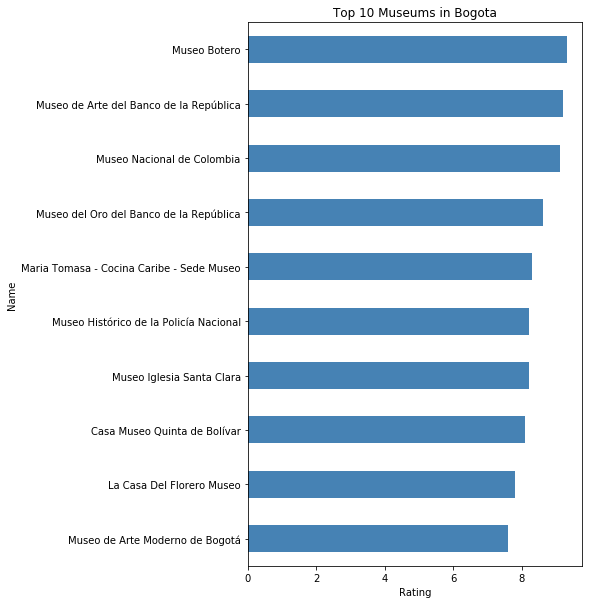

In [22]:
 # generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Bogota')
#-->

#<!--
#\\ # annotate value labels to each country
#for index, value in enumerate(df_top10): 
    #label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    #plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    #plt.annotate(label, xy=(value - 470, index - 0.10), color='white')
#-->

#<!--
plt.show()
#-->

# Let's check how many Museum were returned for each category

In [23]:
df_Bta_Museos_L.groupby('Name').count()

Latitude  Longitude  Category  id  Rating
Name                                                                       
Archie`s                                 1          1         1   1       1
Auditorio Teresa Cuervo Borda            1          1         1   1       1
Cafe Museo Del Oro                       1          1         1   1       1
Casa Museo Jorge Eliécer Gaitán          1          1         1   1       1
Casa Museo Quinta de Bolívar             1          1         1   1       1
...                                    ...        ...       ...  ..     ...
TransMilenio: Museo del Oro              1          1         1   1       1
Typykos Museo Nacional                   1          1         1   1       1
WOK Museo Nacional                       1          1         1   1       1
Zona Gastronómica Museo Nacional         1          1         1   1       1
ibis Bogota Museo                        1          1         1   1       1

[66 rows x 5 columns]

In [24]:
# Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(df_Bta_Museos_L['Category'].unique())))

There are 26 uniques categories.


In [25]:
# Analyze Each Museum

# one hot encoding
MuseoBta_onehot = pd.get_dummies(df_Bta_Museos_L[['Category']], prefix="", prefix_sep="")

# add name column back to dataframe
#MuseoBta_onehot['Name'] = df_Bta_Museos_L['Category']

# move name column to the first column
fixed_columns = [MuseoBta_onehot.columns[-1]] + list(MuseoBta_onehot.columns[:-1])
MuseoBta_onehot = MuseoBta_onehot[fixed_columns]

MuseoBta_onehot.head()


Science Museum  Art Gallery  Art Museum  \
Name                                                                   
Museo De La Chicha                        0            0           0   
Colpatria Museo del Oro                   0            0           0   
Plazoleta Del Museo Del Oro               0            0           0   
Estación Museo Del Oro                    0            0           0   
La casona del museo                       0            0           0   

                             Asian Restaurant  Auditorium  Bank  Building  \
Name                                                                        
Museo De La Chicha                          0           0     0         0   
Colpatria Museo del Oro                     0           0     1         0   
Plazoleta Del Museo Del Oro                 0           0     0         0   
Estación Museo Del Oro                      0           0     0         0   
La casona del museo                         0           0     0         0   

                             Bus Line  Caribbean Restaurant  Coffee Shop  ...  \
Name                                                                      ...   
Museo De La Chicha                  0                     0            0  ...   
Colpatria Museo del Oro             0                     0            0  ...   
Plazoleta Del Museo Del Oro         0                     0            0  ...   
Estación Museo Del Oro              1                     0            0  ...   
La casona del museo                 0                     0            0  ...   

                             Hotel  Italian Restaurant  Jewelry Store  \
Name                                                                    
Museo De La Chicha               0                   0              0   
Colpatria Museo del Oro          0                   0              0   
Plazoleta Del Museo Del Oro      0                   0              0   
Estación Museo Del Oro           0                   0              0   
La casona del museo              0                   0              1   

                             Latin American Restaurant  Museum  Plaza  \
Name                                                                    
Museo De La Chicha                                   0       1      0   
Colpatria Museo del Oro                              0       0      0   
Plazoleta Del Museo Del Oro                          0       0      1   
Estación Museo Del Oro                               0       0      0   
La casona del museo                                  0       0      0   

                             Public Art  \
Name                                      
Museo De La Chicha                    0   
Colpatria Museo del Oro               0   
Plazoleta Del Museo Del Oro           0   
Estación Museo Del Oro                0   
La casona del museo                   0   

                             Residential Building (Apartment / Condo)  \
Name                                                                    
Museo De La Chicha                                                  0   
Colpatria Museo del Oro                                             0   
Plazoleta Del Museo Del Oro                                         0   
Estación Museo Del Oro                                              0   
La casona del museo                                                 0   

                             Restaurant  Sandwich Place  
Name                                                     
Museo De La Chicha                    0               0  
Colpatria Museo del Oro               0               0  
Plazoleta Del Museo Del Oro           0               0  
Estación Museo Del Oro                0               0  
La casona del museo                   0               0  

[5 rows x 26 columns]

In [26]:
## And let's examine the new dataframe size

MuseoBta_onehot.shape

(68, 26)

In [27]:
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoBta_grouped = MuseoBta_onehot.groupby('Name').mean().reset_index()
MuseoBta_grouped

Name  Science Museum  Art Gallery  Art Museum  \
0                           Archie`s             0.0          0.0         0.0   
1      Auditorio Teresa Cuervo Borda             0.0          0.0         0.0   
2                 Cafe Museo Del Oro             0.0          0.0         0.0   
3    Casa Museo Jorge Eliécer Gaitán             0.0          0.0         0.0   
4       Casa Museo Quinta de Bolívar             0.0          0.0         0.0   
..                               ...             ...          ...         ...   
61       TransMilenio: Museo del Oro             0.0          0.0         0.0   
62            Typykos Museo Nacional             0.0          0.0         0.0   
63                WOK Museo Nacional             0.0          0.0         0.0   
64  Zona Gastronómica Museo Nacional             0.0          0.0         0.0   
65                 ibis Bogota Museo             0.0          0.0         0.0   

    Asian Restaurant  Auditorium  Bank  Building  Bus Line  \
0                0.0         0.0   0.0       0.0       0.0   
1                0.0         1.0   0.0       0.0       0.0   
2                0.0         0.0   0.0       0.0       0.0   
3                0.0         0.0   0.0       0.0       0.0   
4                0.0         0.0   0.0       0.0       0.0   
..               ...         ...   ...       ...       ...   
61               0.0         0.0   0.0       0.0       1.0   
62               0.0         0.0   0.0       0.0       0.0   
63               1.0         0.0   0.0       0.0       0.0   
64               0.0         0.0   0.0       0.0       0.0   
65               0.0         0.0   0.0       0.0       0.0   

    Caribbean Restaurant  ...  Hotel  Italian Restaurant  Jewelry Store  \
0                    0.0  ...    0.0                 1.0            0.0   
1                    0.0  ...    0.0                 0.0            0.0   
2                    0.0  ...    0.0                 0.0            0.0   
3                    0.0  ...    0.0                 0.0            0.0   
4                    0.0  ...    0.0                 0.0            0.0   
..                   ...  ...    ...                 ...            ...   
61                   0.0  ...    0.0                 0.0            0.0   
62                   0.0  ...    0.0                 0.0            0.0   
63                   0.0  ...    0.0                 0.0            0.0   
64                   0.0  ...    0.0                 0.0            0.0   
65                   0.0  ...    1.0                 0.0            0.0   

    Latin American Restaurant  Museum  Plaza  Public Art  \
0                         0.0     0.0    0.0         0.0   
1                         0.0     0.0    0.0         0.0   
2                         0.0     0.0    0.0         0.0   
3                         0.0     0.0    0.0         0.0   
4                         0.0     0.0    0.0         0.0   
..                        ...     ...    ...         ...   
61                        0.0     0.0    0.0         0.0   
62                        1.0     0.0    0.0         0.0   
63                        0.0     0.0    0.0         0.0   
64                        0.0     0.0    0.0         0.0   
65                        0.0     0.0    0.0         0.0   

    Residential Building (Apartment / Condo)  Restaurant  Sandwich Place  
0                                        0.0         0.0             0.0  
1                                        0.0         0.0             0.0  
2                                        0.0         1.0             0.0  
3                                        0.0         0.0             0.0  
4                                        0.0         0.0             0.0  
..                                       ...         ...             ...  
61                                       0.0         0.0             0.0  
62                                       0.0         0.0             0.0  
63               

In [28]:
# Let's confirm the new size
MuseoBta_grouped.shape

Museos_Bta_Top = MuseoBta_grouped.drop([0,1,2,5,6,7,8,9,10,11,12,14,16,50,54,55,56,57,59,60,61,62,63,64,65], axis =0)
print("Shape: ", Museos_Bta_Top.shape)
Museos_Bta_Top.head(1)

Shape:  (41, 27)


Name  Science Museum  Art Gallery  Art Museum  \
3  Casa Museo Jorge Eliécer Gaitán             0.0          0.0         0.0   

   Asian Restaurant  Auditorium  Bank  Building  Bus Line  \
3               0.0         0.0   0.0       0.0       0.0   

   Caribbean Restaurant  ...  Hotel  Italian Restaurant  Jewelry Store  \
3                   0.0  ...    0.0                 0.0            0.0   

   Latin American Restaurant  Museum  Plaza  Public Art  \
3                        0.0     0.0    0.0         0.0   

   Residential Building (Apartment / Condo)  Restaurant  Sandwich Place  
3                                       0.0         0.0             0.0  

[1 rows x 27 columns]

In [44]:
# Let's print each name along with the top 5 most common Category

#num_top_venues = 5

#for hood in Museos_Bta_Top['Name']:
   # print("----"+hood+"----")
   # temp = Museos_Bta_Top[Museos_Bta_Top['Name'] == hood].T.reset_index()
   # temp.columns = ['venue','freq']
    #temp = temp.iloc[1:]
    #temp['freq'] = temp['freq'].astype(float)
    #temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [29]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# Now let's create the new dataframe and display the top 5 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Bta_Top['Name']

for ind in np.arange(Museos_Bta_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Bta_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

Name 1st Most Common Venue  \
3   Casa Museo Jorge Eliécer Gaitán        History Museum   
4      Casa Museo Quinta de Bolívar        History Museum   
13        La Casa Del Florero Museo        History Museum   
15                   MUSEO LA SALLE        Science Museum   
17                Museo 20 De Julio         Historic Site   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3         Sandwich Place                 Diner           Art Gallery   
4         Sandwich Place                 Diner           Art Gallery   
13        Sandwich Place                 Diner           Art Gallery   
15            Restaurant           Art Gallery            Art Museum   
17        Sandwich Place                 Diner           Art Gallery   

   5th Most Common Venue  
3             Art Museum  
4             Art Museum  
13            Art Museum  
15      Asian Restaurant  
17            Art Museum

# Cluster Museums


In [31]:
# Run k-means to cluster the name into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Bta_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 0, 1, 0, 2, 4, 4], dtype=int32)

In [32]:
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Bta_Museos

# merge Museum_grouped with  latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!


Museo_Id                               Museo_Bta  \
0  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   
1  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   
2  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   
3  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   
4  4d2d216f0f812c0f6d3d3e6a  Museo Histórico de la Policía Nacional   

                                       Museo_Address  Museo_Bta_Lat  \
0  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...       4.597853   
1                    [Bogotá, Bogotá D.C., Colombia]       4.597853   
2  [Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...       4.597853   
3     [Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]       4.597853   
4  [Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...       4.597853   

   Museo_Bta_Long                                        Museo_name  \
0       -74.07858            Museo Histórico de la Policía Nacional   
1       -74.07858                         Museo Iglesia Santa Clara   
2       -74.07858  Museo Arqueológico Casa del Marqués de San Jorge   
3       -74.07858           Museo de Arte del Banco de la República   
4       -74.07858        Museo de La Independencia Casa del Florero   

  Museo_city                                      Museo_Address  \
0     Bogotá  [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...   
1     Bogotá                    [Bogotá, Bogotá D.C., Colombia]   
2     Bogotá  [Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...   
3     Bogotá     [Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]   
4     Bogotá  [Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...   

   Museo_Latitude  Museo_Longitude  Museo_Category           Museum_Venue_id  \
0        4.597853       -74.078580  History Museum  4d2d216f0f812c0f6d3d3e6a   
1        4.596910       -74.077353  History Museum  4de272d81f6e3190cd0fc59f   
2        4.594906       -74.076164          Museum  50ddcc79498edccad6ed0747   
3        4.596319       -74.073418      Art Museum  4c9e6831ca44236ab69c2a99   
4        4.598400       -74.075241  History Museum  4cfa8620084f548178af7b09   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0        History Museum        Sandwich Place   
1             1.0        History Museum        Sandwich Place   
2             2.0                Museum        Sandwich Place   
3             4.0            Art Museum        Sandwich Place   
4             1.0        History Museum        Sandwich Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                 Diner           Art Gallery            Art Museum  
1                 Diner           Art Gallery            Art Museum  
2                 Diner           Art Gallery            Art Museum  
3            Restaurant           Art Gallery      Asian Restaurant  
4                 Diner           Art Gallery            Art Museum

In [33]:
# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude'], Museum_merged['Museo_Longitude'], Museum_merged['Museo_name'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [35]:
#Examine Clusters

#Clustrier 1

Museum_merged.loc[Museum_merged['Cluster Labels'] == 0, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]


Museo_Bta  \
346   Museo del Oro del Banco de la República   
370           Museo de Arte Moderno de Bogotá   
437              Casa Museo Quinta de Bolívar   
756              TransMilenio: Museo Nacional   
769              TransMilenio: Museo Nacional   
779              TransMilenio: Museo Nacional   
806                Museo Nacional de Colombia   
818                Museo Nacional de Colombia   
850                         ibis Bogota Museo   
865                         ibis Bogota Museo   
940          PROCOLOMBIA Museo Parque Central   
956          PROCOLOMBIA Museo Parque Central   
964          PROCOLOMBIA Museo Parque Central   
967          PROCOLOMBIA Museo Parque Central   
1223                   Museo Fundación Social   
1272                          Museo del Cobre   

                                             Museo_name Museo_city  \
346                   Museo Parque Central - Torre Alta     Bogotá   
370                   Museo Parque Central - Torre Alta     Bogotá   
437                   Museo Parque Central - Torre Alta     Bogotá   
756                   Museo Parque Central - Torre Alta     Bogotá   
769                                   Museo 20 De Julio     Bogotá   
779   Museo Arqueológico Casa Del  Marquez de San Jorge     Bogotá   
806                   Museo Parque Central - Torre Alta     Bogotá   
818                                   Museo 20 De Julio     Bogotá   
850                   Museo Parque Central - Torre Alta     Bogotá   
865                                   Museo 20 De Julio     Bogotá   
940                   Museo Parque Central - Torre Alta     Bogotá   
956                                   Museo 20 De Julio     Bogotá   
964   Museo Arqueológico Casa Del  Marquez de San Jorge     Bogotá   
967                  Museo De Arte Universidad Nacional     Bogotá   
1223                  Museo Parque Central - Torre Alta     Bogotá   
1272                  Museo Parque Central - Torre Alta     Bogotá   

                                          Museo_Address  \
346   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
370   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
437   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
756   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
769                     [Bogotá, Bogotá D.C., Colombia]   
779    [Carrera 6 con 7, Bogotá, Bogotá D.C., Colombia]   
806   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
818                     [Bogotá, Bogotá D.C., Colombia]   
850   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
865                     [Bogotá, Bogotá D.C., Colombia]   
940   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
956                     [Bogotá, Bogotá D.C., Colombia]   
964    [Carrera 6 con 7, Bogotá, Bogotá D.C., Colombia]   
967                     [Bogotá, Bogotá D.C., Colombia]   
1223  [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   
1272  [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]   

                                          Museo_Address  Museo_Latitude  \
346   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
370   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
437   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
756   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
769                     [Bogotá, Bogotá D.C., Colombia]        4.626844   
779    [Carrera 6 con 7, Bogotá, Bogotá D.C., Colombia]        4.634585   
806   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
818                     [Bogotá, Bogotá D.C., Colombia]        4.626844   
850   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
865                     [Bogotá, Bogotá D.C., Colombia]        4.626844   
940   [Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]        4.616766   
956                     [Bogotá, Bogotá D.C., Colombia]        4.626844   
964    [Carrera 6 con 7, Bogotá,

In [36]:
#Clustrier 2

Museum_merged.loc[Museum_merged['Cluster Labels'] == 1, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Bta  \
0                Museo Histórico de la Policía Nacional   
1                Museo Histórico de la Policía Nacional   
4                Museo Histórico de la Policía Nacional   
6                Museo Histórico de la Policía Nacional   
10               Museo Histórico de la Policía Nacional   
...                                                 ...   
1340  Plazoleta Museo De Arte Del Banco De La República   
1346  Plazoleta Museo De Arte Del Banco De La República   
1349  Plazoleta Museo De Arte Del Banco De La República   
1352  Plazoleta Museo De Arte Del Banco De La República   
1359  Plazoleta Museo De Arte Del Banco De La República   

                                      Museo_name Museo_city  \
0         Museo Histórico de la Policía Nacional     Bogotá   
1                      Museo Iglesia Santa Clara     Bogotá   
4     Museo de La Independencia Casa del Florero     Bogotá   
6        Museo del Oro del Banco de la República     Bogotá   
10                  Casa Museo Quinta de Bolívar     Bogotá   
...                                          ...        ...   
1340                               Museo Militar     Bogotá   
1346                  Museo Nacional de Colombia     Bogotá   
1349                          Museo Arqueologico     Bogotá   
1352                   La Casa Del Florero Museo              
1359       Museo Univeridad Nacional De Colombia              

                                          Museo_Address  \
0     [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...   
1                       [Bogotá, Bogotá D.C., Colombia]   
4     [Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...   
6     [Santander Park (at Corner Cr 5 and 16th Stree...   
10    [Calle 20 # 2-91 este, Bogotá, Bogotá D.C., Co...   
...                                                 ...   
1340                    [Bogotá, Bogotá D.C., Colombia]   
1346  [Carrera 7 #28-66 (Calles 28 y 29), Bogotá, Bo...   
1349      [Cra 6 # 7-43, Bogotá, Bogotá D.C., Colombia]   
1352                                         [Colombia]   
1359                                         [Colombia]   

                                          Museo_Address  Museo_Latitude  \
0     [Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...        4.597853   
1                       [Bogotá, Bogotá D.C., Colombia]        4.596910   
4     [Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...        4.598400   
6     [Santander Park (at Corner Cr 5 and 16th Stree...        4.601920   
10    [Calle 20 # 2-91 este, Bogotá, Bogotá D.C., Co...        4.602593   
...                                                 ...             ...   
1340                    [Bogotá, Bogotá D.C., Colombia]        4.596377   
1346  [Carrera 7 #28-66 (Calles 28 y 29), Bogotá, Bo...        4.615545   
1349      [Cra 6 # 7-43, Bogotá, Bogotá D.C., Colombia]        4.594862   
1352                                         [Colombia]        4.598417   
1359                                         [Colombia]        4.590529   

      Museo_Longitude  Museo_Category           Museum_Venue_id  \
0          -74.078580  History Museum  4d2d216f0f812c0f6d3d3e6a   
1          -74.077353  History Museum  4de272d81f6e3190cd0fc59f   
4          -74.075241  History Museum  4cfa8620084f548178af7b09   
6          -74.071941  History Museum  4c7ab97e278eb713a3635b80   
10         -74.063274  History Museum  4c366b65298e9c742dbc07e3   
...               ...             ...                       ...   
1340       -74.073865  History Museum  4e1c5aa314954cd5e421d59c   
1346       -74.068301  History Museum  4b6f2033f964a520c4de2ce3   
1349       -74.076213  History Museum  51927c822fc6e0964fced314   
1352       -74.074879  History Museum  5027eb26e4b08c739c1062ad   
1359       -74.077105  History Museum  4eee34729911d70cb8aab54c   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1.0        History Museum        Sandwich Place   
1                1.0        H

In [37]:
#Clustrier 3

Museum_merged.loc[Museum_merged['Cluster Labels'] == 2, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Bta  \
2                Museo Histórico de la Policía Nacional   
9                Museo Histórico de la Policía Nacional   
11               Museo Histórico de la Policía Nacional   
12               Museo Histórico de la Policía Nacional   
13               Museo Histórico de la Policía Nacional   
...                                                 ...   
1351  Plazoleta Museo De Arte Del Banco De La República   
1353  Plazoleta Museo De Arte Del Banco De La República   
1354  Plazoleta Museo De Arte Del Banco De La República   
1358  Plazoleta Museo De Arte Del Banco De La República   
1369  Plazoleta Museo De Arte Del Banco De La República   

                                            Museo_name Museo_city  \
2     Museo Arqueológico Casa del Marqués de San Jorge     Bogotá   
9                                  Museo Del Siglo XIX     Bogotá   
11                      Museo Francisco Jose De Caldas              
12                                      Museo Colonial     Bogotá   
13              Museo de Trajes Regionales de Colombia     Bogotá   
...                                                ...        ...   
1351                                Museo De La Chicha     Bogotá   
1353                               Museo Del Siglo XIX     Bogotá   
1354                    Museo Francisco Jose De Caldas              
1358               Museo Internacional de la Esmeralda     Bogotá   
1369                       Museo Exposicion: El Hombre              

                                          Museo_Address  \
2     [Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...   
9          [cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]   
11                                           [Colombia]   
12    [Cra 6 # 9 - 77 (Cra 6ª con Calle 10ª), Bogotá...   
13       [Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]   
...                                                 ...   
1351                    [Bogotá, Bogotá D.C., Colombia]   
1353       [cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]   
1354                                         [Colombia]   
1358      [Edf. Avianca, Bogotá, Bogotá D.C., Colombia]   
1369                                         [Colombia]   

                                          Museo_Address  Museo_Latitude  \
2     [Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...        4.594906   
9          [cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]        4.596175   
11                                           [Colombia]        4.595006   
12    [Cra 6 # 9 - 77 (Cra 6ª con Calle 10ª), Bogotá...        4.596358   
13       [Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]        4.597059   
...                                                 ...             ...   
1351                    [Bogotá, Bogotá D.C., Colombia]        4.597488   
1353       [cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]        4.596175   
1354                                         [Colombia]        4.595006   
1358      [Edf. Avianca, Bogotá, Bogotá D.C., Colombia]        4.602347   
1369                                         [Colombia]        4.615731   

      Museo_Longitude Museo_Category           Museum_Venue_id  \
2          -74.076164         Museum  50ddcc79498edccad6ed0747   
9          -74.077970         Museum  570747d0498e6182178d5463   
11         -74.079043         Museum  50ae7f81e4b0a74d3409d271   
12         -74.075184         Museum  4c002df875fc95218bb14898   
13         -74.075103         Museum  4f199d63e4b032dcf566b2cd   
...               ...            ...                       ...   
1351       -74.069210         Museum  59e12cd7bed483788616c4a7   
1353       -74.077970         Museum  570747d0498e6182178d5463   
1354       -74.079043         Museum  50ae7f81e4b0a74d3409d271   
1358       -74.071993         Museum  4e4fff07b0fb088f3c23c49b   
1369       -74.077308         Museum  4d3b502d1fc36dcbb14b70f5   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2                2.0                M

In [38]:
#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 3, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Bta  \
23               Museo Histórico de la Policía Nacional   
29               Museo Histórico de la Policía Nacional   
41               Museo Histórico de la Policía Nacional   
77           Museo de La Independencia Casa del Florero   
87           Museo de La Independencia Casa del Florero   
...                                                 ...   
1316                                     MUSEO LA SALLE   
1317                                     MUSEO LA SALLE   
1345  Plazoleta Museo De Arte Del Banco De La República   
1364  Plazoleta Museo De Arte Del Banco De La República   
1367  Plazoleta Museo De Arte Del Banco De La República   

                                     Museo_name Museo_city  \
23    Museo de la Sociedad de Cirugía de Bogotá     Bogotá   
29                               MUSEO LA SALLE              
41                         Museo del Mar UTADEO              
77                               MUSEO LA SALLE              
87    Museo de la Sociedad de Cirugía de Bogotá     Bogotá   
...                                         ...        ...   
1316  Museo de la Sociedad de Cirugía de Bogotá     Bogotá   
1317                       Museo del Mar UTADEO              
1345                             MUSEO LA SALLE              
1364  Museo de la Sociedad de Cirugía de Bogotá     Bogotá   
1367                       Museo del Mar UTADEO              

                                          Museo_Address  \
23    [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...   
29                                           [Colombia]   
41                                           [Colombia]   
77                                           [Colombia]   
87    [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...   
...                                                 ...   
1316  [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...   
1317                                         [Colombia]   
1345                                         [Colombia]   
1364  [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...   
1367                                         [Colombia]   

                                          Museo_Address  Museo_Latitude  \
23    [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...        4.602948   
29                                           [Colombia]        4.594646   
41                                           [Colombia]        4.607131   
77                                           [Colombia]        4.594646   
87    [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...        4.602948   
...                                                 ...             ...   
1316  [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...        4.602948   
1317                                         [Colombia]        4.607131   
1345                                         [Colombia]        4.594646   
1364  [Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...        4.602948   
1367                                         [Colombia]        4.607131   

      Museo_Longitude  Museo_Category           Museum_Venue_id  \
23         -74.087057  Science Museum  539ef1e2498e2eba582537ac   
29         -74.070519  Science Museum  4f8cbb54e4b05ee6cd444404   
41         -74.067674  Science Museum  511128d7e4b00d021dbe61c8   
77         -74.070519  Science Museum  4f8cbb54e4b05ee6cd444404   
87         -74.087057  Science Museum  539ef1e2498e2eba582537ac   
...               ...             ...                       ...   
1316       -74.087057  Science Museum  539ef1e2498e2eba582537ac   
1317       -74.067674  Science Museum  511128d7e4b00d021dbe61c8   
1345       -74.070519  Science Museum  4f8cbb54e4b05ee6cd444404   
1364       -74.087057  Science Museum  539ef1e2498e2eba582537ac   
1367       -74.067674  Science Museum  511128d7e4b00d021dbe61c8   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
23               3.0        Science Museum            Restaurant   
29               3.0        Science Museu

In [39]:
#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 4, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Bta  \
3                Museo Histórico de la Policía Nacional   
5                Museo Histórico de la Policía Nacional   
8                Museo Histórico de la Policía Nacional   
14               Museo Histórico de la Policía Nacional   
21               Museo Histórico de la Policía Nacional   
...                                                 ...   
1339  Plazoleta Museo De Arte Del Banco De La República   
1341  Plazoleta Museo De Arte Del Banco De La República   
1344  Plazoleta Museo De Arte Del Banco De La República   
1365  Plazoleta Museo De Arte Del Banco De La República   
1366  Plazoleta Museo De Arte Del Banco De La República   

                                           Museo_name Museo_city  \
3             Museo de Arte del Banco de la República     Bogotá   
5                                        Museo Botero     Bogotá   
8                     Museo de Arte Moderno de Bogotá     Bogotá   
14                             Museo de Arte Colonial     Bogotá   
21                Museo De Arte Miguel Urrutia - Mamu     Bogotá   
...                                               ...        ...   
1339                  Museo de Arte Moderno de Bogotá     Bogotá   
1341  Sala Luis Caballero Museo Banco de la República              
1344                           Museo de Arte Colonial     Bogotá   
1365                      Museo Artes Visuales Utadeo              
1366                          Museo De Artes Visuales     Bogotá   

                                          Museo_Address  \
3        [Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]   
5     [Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]   
8       [Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]   
14    [Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]   
21      [Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]   
...                                                 ...   
1339    [Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]   
1341                                         [Colombia]   
1344  [Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]   
1365                                         [Colombia]   
1366                    [Bogotá, Bogotá D.C., Colombia]   

                                          Museo_Address  Museo_Latitude  \
3        [Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]        4.596319   
5     [Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]        4.596705   
8       [Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]        4.610175   
14    [Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]        4.596616   
21      [Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]        4.596341   
...                                                 ...             ...   
1339    [Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]        4.610175   
1341                                         [Colombia]        4.596006   
1344  [Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]        4.596616   
1365                                         [Colombia]        4.606034   
1366                    [Bogotá, Bogotá D.C., Colombia]        4.606176   

      Museo_Longitude Museo_Category           Museum_Venue_id  \
3          -74.073418     Art Museum  4c9e6831ca44236ab69c2a99   
5          -74.073165     Art Museum  4b79975ef964a520e4032fe3   
8          -74.069359     Art Museum  4bd2303b77b29c742a3b8e82   
14         -74.075350     Art Museum  50280c1ae4b0fe423e0b2111   
21         -74.073402     Art Museum  5a4578e1bed4834ef216670d   
...               ...            ...                       ...   
1339       -74.069359     Art Museum  4bd2303b77b29c742a3b8e82   
1341       -74.072277     Art Museum  4ebd44bd02d5e32b7bc9db4f   
1344       -74.075350     Art Museum  50280c1ae4b0fe423e0b2111   
1365       -74.067381     Art Museum  4fb3cf3ee4b0f71c08d19f73   
1366       -74.067203     Art Museum  4e78d386c65b8073f5aa674a   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                4.0            Art Museum       

# 

#

#

# La Paz - Bolivia

In [40]:
# So let's start by converting the La Paz - Bolivia address to its latitude and longitude coordinates.
CLIENT_ID = 'OB32TCVW5P2A4TVMV5DXJ2GWTXNA1IVU0D4AL4BCZJ3DXK2N' # your Foursquare ID
CLIENT_SECRET = 'WI2DHE54HPL4MKTC04NX3BRBUVZSGV1WO4XH0T5PZH3PGPZQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30


address = 'La Paz, Bolivia'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-16.4955455 -68.1336229
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=OB32TCVW5P2A4TVMV5DXJ2GWTXNA1IVU0D4AL4BCZJ3DXK2N&client_secret=WI2DHE54HPL4MKTC04NX3BRBUVZSGV1WO4XH0T5PZH3PGPZQ&ll=-16.4955455,-68.1336229&v=20180604&query=Museo&radius=900000&limit=30'

In [41]:
# Send the GET Request and examine the results

results1 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues1 = results1['response']['venues']
#print(result['response']['venue'].keys())

# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Paz = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues1:
    Ids_Paz = data['id'] 
    museo_Paz = data['name'] 
        
    location_lat_Paz = data['location']['lat']
    location_lng_Paz= data['location']['lng']
 
    location_Add_Paz = data['location']['formattedAddress']    
    location_address_Paz = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Paz = Museos_Paz.append({'Museo':museo_Paz,
                            'Id':Ids_Paz,
                            'Address': location_address_Paz,
                            'Latitude': location_lat_Paz,
                            'Longitude': location_lng_Paz}, ignore_index=True)

print("Shape: ", Museos_Paz.shape)



Shape:  (30, 5)


In [42]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Paz_Museos = pd.DataFrame(columns = ['Museo_Id_Paz', 'Museo_Paz', 'Museo_Address_Paz', 'Museo_Paz_Lat', 'Museo_Paz_Long','Museo_name_Paz', 
                                        'Museo_city_Paz', 'Museo_Address_Paz', 'Museo_Latitude_Paz', 'Museo_Longitude_Paz', 'Museo_Category_Paz',
                                       'Museum_Venue_id_Paz'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the La paz museum data
for index, row in Museos_Paz.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results1 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results1['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name_Paz = results1['response']['venues'][i]['name']
        
        try:
            Museum_city_Paz = results1['response']['venues'][i]['location']['city']
        except:
            Museum_city_Paz = ''
            
        Museum_address_Paz = results1['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Paz = results1['response']['venues'][i]['location']['lat']
        Museum_longitude_Paz = results1['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Paz = results1['response']['venues'][i]['id']
        

 # Check to see if the museum has any categories
        if (len(results1['response']['venues'][i]['categories']) > 0):
            Museum_category_Paz = results1['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Paz = ''
        
        # Add the data row to the Museum dataframe
        df_Paz_Museos = df_Paz_Museos.append({'Museo_Id_Paz' : Id,
                                              'Museo_Paz' : Museo, 
                                              'Museo_Address_Paz' : Museo_Add, 
                                              'Museo_Paz_Lat' : LATITUDE, 
                                              'Museo_Paz_Long' : LONGITUDE,  
                                              'Museo_name_Paz' : Museum_name_Paz,
                                              'Museo_city_Paz' : Museum_city_Paz, 
                                              'Museo_Address_Paz' : Museum_address_Paz,
                                              'Museo_Latitude_Paz' : Museum_latitude_Paz,
                                              'Museo_Longitude_Paz' : Museum_longitude_Paz, 
                                              'Museo_Category_Paz' : Museum_category_Paz,
                                               'Museum_Venue_id_Paz' : Museum_Venue_id_Paz}, ignore_index=True)

# Print the first 10 rows of the Restaurants dataframe
df_Paz_Museos.head(1)

# create a copy of the restaurants dataframe for storing the new list without the duplicate museums
df_Paz_Museos_L = df_Paz_Museos.drop_duplicates(subset='Museum_Venue_id_Paz', keep='first', inplace=False)
print (df_Paz_Museos_L.shape)
df_Paz_Museos_L.head(10)

(32, 12)


Museo_Id_Paz                                 Museo_Paz  \
0  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
1  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
2  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
3  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
4  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
5  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
6  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
7  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
8  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
9  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   

                                   Museo_Address_Paz  Museo_Paz_Lat  \
0                  [Calle Jaen 777, La Paz, Bolivia]     -16.496983   
1  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...     -16.496983   
2         [Linares 906 (Sagarnaga), La Paz, Bolivia]     -16.496983   
3                         [R Ortiz, La Paz, Bolivia]     -16.496983   
4          [Comercio (at Socabaya), La Paz, Bolivia]     -16.496983   
5                                  [La Paz, Bolivia]     -16.496983   
6            [San Francisco square, La Paz, Bolivia]     -16.496983   
7                       [Sagarnaga, La Paz, Bolivia]     -16.496983   
8      [Avenida Sucre (Calle Jaén), La Paz, Bolivia]     -16.496983   
9                                  [La Paz, Bolivia]     -16.496983   

   Museo_Paz_Long                                   Museo_name_Paz  \
0      -68.133939         Museo De Metales Preciosos Precolombinos   
1      -68.133939  MUSEF (Museo Nacional de Etnografía y Folklore)   
2      -68.133939                                 Museo de la Coca   
3      -68.133939               Museo De Atte Contemoraneo "Plaza"   
4      -68.133939                           Museo nacional de arte   
5      -68.133939                          Museo Postal Filatelico   
6      -68.133939                              Museo San Francisco   
7      -68.133939                                 Museo de la coca   
8      -68.133939              Museo Costumbrista "Juan de Vargas"   
9      -68.133939       Museo De Instrumentos Musicales De Bolivia   

      Museo_city_Paz                                  Museo_Address_Paz  \
0             La Paz                  [Calle Jaen 777, La Paz, Bolivia]   
1             La Paz  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...   
2             La Paz         [Linares 906 (Sagarnaga), La Paz, Bolivia]   
3             La Paz                         [R Ortiz, La Paz, Bolivia]   
4             La Paz          [Comercio (at Socabaya), La Paz, Bolivia]   
5             La Paz                                  [La Paz, Bolivia]   
6             La Paz            [San Francisco square, La Paz, Bolivia]   
7             La Paz                       [Sagarnaga, La Paz, Bolivia]   
8  Provincia Murillo      [Avenida Sucre (Calle Jaén), La Paz, Bolivia]   
9             La Paz                                  [La Paz, Bolivia]   

   Museo_Latitude_Paz  Museo_Longitude_Paz Museo_Category_Paz  \
0          -16.496983           -68.133939             Museum   
1          -16.494466           -68.135045             Museum   
2          -16.496417           -68.139337             Museum   
3          -16.496545           -68.134007         Art Museum   
4          -16.495748           -68.134499         Art Museum   
5          -16.498920           -68.135178             Museum   
6          -16.496148           -68.137153             Museum   
7          -16.497794           -68.138242    Cultural Center   
8          -16.491714           -68.135627             Museum   
9          -16.492571           -68.136041     History Museum   

        Museum_Venue_id_Paz  
0  4dd86975d22d38ef4301d129  
1  4cde7ad89fda8eeca4369f03  
2  51d71728e4b00508e629bdf

###### we have some museums in La Paz

# Museum Ratings from Foursquare

In [43]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Paz_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the museum dataframe
    df_Paz_Museos_L.loc[index, 'Rating'] = rating

df_Paz_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Museo_Id_Paz                                 Museo_Paz  \
0  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
1  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   

                                   Museo_Address_Paz  Museo_Paz_Lat  \
0                  [Calle Jaen 777, La Paz, Bolivia]     -16.496983   
1  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...     -16.496983   

   Museo_Paz_Long                                   Museo_name_Paz  \
0      -68.133939         Museo De Metales Preciosos Precolombinos   
1      -68.133939  MUSEF (Museo Nacional de Etnografía y Folklore)   

  Museo_city_Paz                                  Museo_Address_Paz  \
0         La Paz                  [Calle Jaen 777, La Paz, Bolivia]   
1         La Paz  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...   

   Museo_Latitude_Paz  Museo_Longitude_Paz Museo_Category_Paz  \
0          -16.496983           -68.133939             Museum   
1          -16.494466           -68.135045             Museum   

        Museum_Venue_id_Paz  Rating  
0  4dd86975d22d38ef4301d129     0.0  
1  4cde7ad89fda8eeca4369f03     6.9

# Barh Clasification

In [44]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Paz_Museos_L.drop(['Museo_Id_Paz', 'Museo_Paz', 'Museo_Address_Paz', 'Museo_Paz_Lat', 'Museo_Paz_Long','Museo_city_Paz'], axis=1, inplace=True)

# let's view the first element and see how the dataframe was changed
df_Paz_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Museo_name_Paz  Museo_Latitude_Paz  \
0         Museo De Metales Preciosos Precolombinos          -16.496983   
1  MUSEF (Museo Nacional de Etnografía y Folklore)          -16.494466   
2                                 Museo de la Coca          -16.496417   
3               Museo De Atte Contemoraneo "Plaza"          -16.496545   
4                           Museo nacional de arte          -16.495748   

   Museo_Longitude_Paz Museo_Category_Paz       Museum_Venue_id_Paz  Rating  
0           -68.133939             Museum  4dd86975d22d38ef4301d129     0.0  
1           -68.135045             Museum  4cde7ad89fda8eeca4369f03     6.9  
2           -68.139337             Museum  51d71728e4b00508e629bdf2     0.0  
3           -68.134007         Art Museum  4e06777dd1640223a49708fc     0.0  
4           -68.134499         Art Museum  4cdeed8498ab6a31603660e1     7.4

In [45]:
# Rename some of the columns so that they make sense.

df_Paz_Museos_L.rename(columns={'Museo_name_Paz':'Name', 'Museo_Latitude_Paz':'Latitude','Museo_Longitude_Paz':'Longitude','Museo_Category_Paz':'Category',
                       'Museum_Venue_id_Paz':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Paz_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Name   Latitude  Longitude  \
0         Museo De Metales Preciosos Precolombinos -16.496983 -68.133939   
1  MUSEF (Museo Nacional de Etnografía y Folklore) -16.494466 -68.135045   
2                                 Museo de la Coca -16.496417 -68.139337   
3               Museo De Atte Contemoraneo "Plaza" -16.496545 -68.134007   
4                           Museo nacional de arte -16.495748 -68.134499   

     Category                        id  Rating  
0      Museum  4dd86975d22d38ef4301d129     0.0  
1      Museum  4cde7ad89fda8eeca4369f03     6.9  
2      Museum  51d71728e4b00508e629bdf2     0.0  
3  Art Museum  4e06777dd1640223a49708fc     0.0  
4  Art Museum  4cdeed8498ab6a31603660e1     7.4

In [46]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Paz_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Paz_Museos_L.set_index('Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Paz_Museos_L.head()

Latitude  Longitude  \
Name                                                                    
Museo De Metales Preciosos Precolombinos        -16.496983 -68.133939   
MUSEF (Museo Nacional de Etnografía y Folklore) -16.494466 -68.135045   
Museo de la Coca                                -16.496417 -68.139337   
Museo De Atte Contemoraneo "Plaza"              -16.496545 -68.134007   
Museo nacional de arte                          -16.495748 -68.134499   

                                                   Category  \
Name                                                          
Museo De Metales Preciosos Precolombinos             Museum   
MUSEF (Museo Nacional de Etnografía y Folklore)      Museum   
Museo de la Coca                                     Museum   
Museo De Atte Contemoraneo "Plaza"               Art Museum   
Museo nacional de arte                           Art Museum   

                                                                       id  \
Name                                                                        
Museo De Metales Preciosos Precolombinos         4dd86975d22d38ef4301d129   
MUSEF (Museo Nacional de Etnografía y Folklore)  4cde7ad89fda8eeca4369f03   
Museo de la Coca                                 51d71728e4b00508e629bdf2   
Museo De Atte Contemoraneo "Plaza"               4e06777dd1640223a49708fc   
Museo nacional de arte                           4cdeed8498ab6a31603660e1   

                                                 Rating  
Name                                                     
Museo De Metales Preciosos Precolombinos            0.0  
MUSEF (Museo Nacional de Etnografía y Folklore)     6.9  
Museo de la Coca                                    0.0  
Museo De Atte Contemoraneo "Plaza"                  0.0  
Museo nacional de arte                              7.4

In [47]:
### type your answer here

#\\ # sort dataframe on 'Rating' column (descending)
df_Paz_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Paz_Museos_L['Rating'].tail(10)
df_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name
Museo De Instrumentos Musicales De Bolivia         0.0
Museo Cuetillero                                   0.0
Museo Casa de Murillo                              0.0
Museo Tambo Quirquincho                            0.0
Museo Costumbrista "Juan de Vargas"                0.0
MUSEF (Museo Nacional de Etnografía y Folklore)    6.9
Museo nacional de arte                             7.4
Museo de Arte Contemporáneo Plaza                  7.5
Museo del Sitio de Tiwanaku                        7.5
Museo San Francisco                                7.5
Name: Rating, dtype: float64

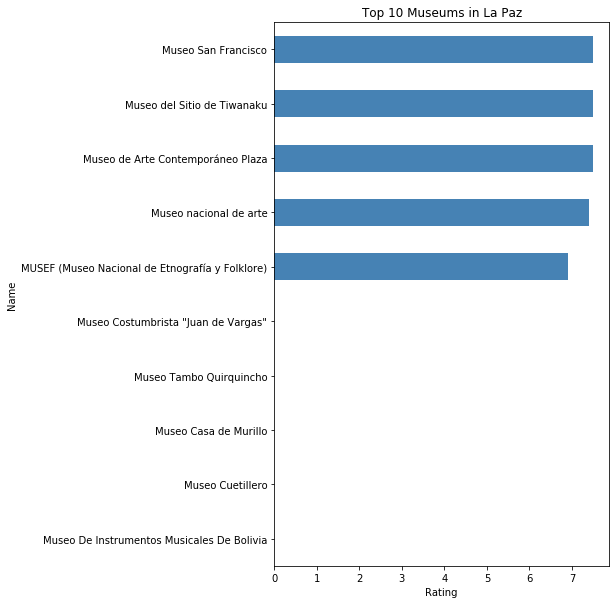

In [48]:
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in La Paz')
#-->
#<!--
plt.show()
#-->

# Let's check how many Museum were returned for each category

In [49]:
df_Paz_Museos_L.groupby('Name').count()

Latitude  Longitude  \
Name                                                                    
Casa Museo Solón                                         1          1   
MUSEF (Museo Nacional de Etnografía y Folklore)          1          1   
Museo Casa de Murillo                                    1          1   
Museo Cerámico                                           1          1   
Museo Costumbrista "Juan de Vargas"                      1          1   
Museo Cuetillero                                         1          1   
Museo De Atte Contemoraneo "Plaza"                       1          1   
Museo De Instrumentos Musicales De Bolivia               1          1   
Museo De Metales Preciosos Precolombinos                 1          1   
Museo De Textiles Andinos Bolivianos                     1          1   
Museo Del Litoral Boliviano                              1          1   
Museo Elsa Paredes de Salazar                            1          1   
Museo Historico del Colegio Militar del Ejercito         1          1   
Museo Litoral Boliviano                                  1          1   
Museo Litoral Boloviano                                  1          1   
Museo Lítico                                             1          1   
Museo Nacional Arqueologia Tiwanaku                      1          1   
Museo Nacional de Historia Natural                       1          1   
Museo Postal Filatelico                                  1          1   
Museo San Francisco                                      1          1   
Museo Tambo Quirquincho                                  1          1   
Museo de Arte Antonio Paredes Candia                     1          1   
Museo de Arte Contemporáneo Plaza                        1          1   
Museo de la Coca                                         1          1   
Museo de la Revolucion Nacional                          1          1   
Museo de la Revolucion National                          1          1   
Museo de la coca                                         1          1   
Museo del Aparapita                                      1          1   
Museo del Archivo Histórico Minero                       1          1   
Museo del Sitio de Tiwanaku                              1          1   
Museo nacional de arte                                   1          1   
Piripipi, Museo Infantil                                 1          1   

                                                  Category  id  Rating  
Name                                                                    
Casa Museo Solón                                         1   1       1  
MUSEF (Museo Nacional de Etnografía y Folklore)          1   1       1  
Museo Casa de Murillo                                    1   1       1  
Museo Cerámico                                           1   1       1  
Museo Costumbrista "Juan de Vargas"                      1   1       1  
Museo Cuetillero                                         1   1       1  
Museo De Atte Contemoraneo "Plaza"                       1   1       1  
Museo De Instrumentos Musicales De Bolivia               1   1       1  
Museo De Metales Preciosos Precolombinos                 1   1       1  
Museo De Textiles Andinos Bolivianos                     1   1       1  
Museo Del Litoral Boliviano                              1   1       1  
Museo Elsa Paredes de Salazar                            1   1       1  
Museo Historico del Colegio Militar del Ejercito         1   1       1  
Museo Litoral Boliviano                                  1   1       1  
Museo Litoral Boloviano                                  1   1       1  
Museo Lítico                                             1   1       1  
Museo Nacional Arqueologia Tiwanaku                      1   1       1  
Museo Nacional de Historia Natural                       1   1       1  
Museo Postal Filatelico                                  1   1       1  
Museo San Francisco               

In [50]:
# Analyze Each Museum

# one hot encoding
MuseoPaz_onehot = pd.get_dummies(df_Paz_Museos_L[['Category']], prefix="", prefix_sep="")

# move name column to the first column
fixed_columns = [MuseoPaz_onehot.columns[-1]] + list(MuseoPaz_onehot.columns[:-1])
MuseoPaz_onehot = MuseoPaz_onehot[fixed_columns]

MuseoPaz_onehot.head()

Theme Park Ride / Attraction  \
Name                                                                             
Museo De Metales Preciosos Precolombinos                                     0   
Museo Del Litoral Boliviano                                                  0   
Museo Historico del Colegio Militar del Ejercito                             0   
Museo de Arte Antonio Paredes Candia                                         0   
Museo Nacional de Historia Natural                                           0   

                                                  Art Gallery  Art Museum  \
Name                                                                        
Museo De Metales Preciosos Precolombinos                    0           0   
Museo Del Litoral Boliviano                                 0           0   
Museo Historico del Colegio Militar del Ejercito            0           0   
Museo de Arte Antonio Paredes Candia                        0           1   
Museo Nacional de Historia Natural                          0           0   

                                                  Bar  Cultural Center  \
Name                                                                     
Museo De Metales Preciosos Precolombinos            0                0   
Museo Del Litoral Boliviano                         0                0   
Museo Historico del Colegio Militar del Ejercito    0                0   
Museo de Arte Antonio Paredes Candia                0                0   
Museo Nacional de Historia Natural                  0                0   

                                                  History Museum  Museum  \
Name                                                                       
Museo De Metales Preciosos Precolombinos                       0       1   
Museo Del Litoral Boliviano                                    1       0   
Museo Historico del Colegio Militar del Ejercito               1       0   
Museo de Arte Antonio Paredes Candia                           0       0   
Museo Nacional de Historia Natural                             0       0   

                                                  Science Museum  
Name                                                              
Museo De Metales Preciosos Precolombinos                       0  
Museo Del Litoral Boliviano                                    0  
Museo Historico del Colegio Militar del Ejercito               0  
Museo de Arte Antonio Paredes Candia                           0  
Museo Nacional de Historia Natural                             1

In [51]:
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoPaz_grouped = MuseoPaz_onehot.groupby('Name').mean().reset_index()
MuseoPaz_grouped

Name  \
0                                   Casa Museo Solón   
1    MUSEF (Museo Nacional de Etnografía y Folklore)   
2                              Museo Casa de Murillo   
3                                     Museo Cerámico   
4                Museo Costumbrista "Juan de Vargas"   
5                                   Museo Cuetillero   
6                 Museo De Atte Contemoraneo "Plaza"   
7         Museo De Instrumentos Musicales De Bolivia   
8           Museo De Metales Preciosos Precolombinos   
9               Museo De Textiles Andinos Bolivianos   
10                       Museo Del Litoral Boliviano   
11                     Museo Elsa Paredes de Salazar   
12  Museo Historico del Colegio Militar del Ejercito   
13                           Museo Litoral Boliviano   
14                           Museo Litoral Boloviano   
15                                      Museo Lítico   
16               Museo Nacional Arqueologia Tiwanaku   
17                Museo Nacional de Historia Natural   
18                           Museo Postal Filatelico   
19                               Museo San Francisco   
20                           Museo Tambo Quirquincho   
21              Museo de Arte Antonio Paredes Candia   
22                 Museo de Arte Contemporáneo Plaza   
23                                  Museo de la Coca   
24                   Museo de la Revolucion Nacional   
25                   Museo de la Revolucion National   
26                                  Museo de la coca   
27                               Museo del Aparapita   
28                Museo del Archivo Histórico Minero   
29                       Museo del Sitio de Tiwanaku   
30                            Museo nacional de arte   
31                          Piripipi, Museo Infantil   

    Theme Park Ride / Attraction  Art Gallery  Art Museum  Bar  \
0                              0            0           1    0   
1                              0            0           0    0   
2                              0            0           0    0   
3                              0            0           0    0   
4                              0            0           0    0   
5                              0            0           0    1   
6                              0            0           1    0   
7                              0            0           0    0   
8                              0            0           0    0   
9                              0            0           1    0   
10                             0            0           0    0   
11                             0            0           0    0   
12                             0            0           0    0   
13                             0            0           0    0   
14                             0            0           0    0   
15                             0            0           0    0   
16                             0            0           0    0   
17                             0            0           0    0   
18                             0            0           0    0   
19                             0            0           0    0   
20                             0            0           0    0   
21                             0            0           1    0   
22                             0            1           0    0   
23                             0            0           0    0   
24                             0            0           0    0   
25                             0            0           0    0   
26                             0            0           0    0   
27                             0            0           1    0   
28                             0            0           0    0   
29                             0            0           0    0   
30                             0            0           1    0   
31                             1            0           0    0   

    Cultural Center 

In [52]:
# Let's confirm the new size
MuseoPaz_grouped.shape

Museos_Paz_Top = MuseoPaz_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Paz_Top.shape)
Museos_Paz_Top.head(1)

Shape:  (32, 9)


Name  Theme Park Ride / Attraction  Art Gallery  Art Museum  \
0  Casa Museo Solón                             0            0           1   

   Bar  Cultural Center  History Museum  Museum  Science Museum  
0    0                0               0       0               0

In [53]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
# Now let's create the new dataframe and display the top 5 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Paz_Top['Name']

for ind in np.arange(Museos_Paz_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Paz_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

Name 1st Most Common Venue  \
0                                 Casa Museo Solón            Art Museum   
1  MUSEF (Museo Nacional de Etnografía y Folklore)                Museum   
2                            Museo Casa de Murillo        History Museum   
3                                   Museo Cerámico        History Museum   
4              Museo Costumbrista "Juan de Vargas"                Museum   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Science Museum                Museum        History Museum   
1        Science Museum        History Museum       Cultural Center   
2        Science Museum                Museum       Cultural Center   
3        Science Museum                Museum       Cultural Center   
4        Science Museum        History Museum       Cultural Center   

  5th Most Common Venue  
0       Cultural Center  
1                   Bar  
2                   Bar  
3                   Bar  
4                   Bar

# Cluster Museums

In [55]:
# Run k-means to cluster the name into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Paz_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 1, 3, 0, 2, 1, 3, 2], dtype=int32)

In [56]:
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Paz_Museos

# merge toronto_grouped with latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Paz')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!


Museo_Id_Paz                                 Museo_Paz  \
0  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
1  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
2  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
3  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   
4  4dd86975d22d38ef4301d129  Museo De Metales Preciosos Precolombinos   

                                   Museo_Address_Paz  Museo_Paz_Lat  \
0                  [Calle Jaen 777, La Paz, Bolivia]     -16.496983   
1  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...     -16.496983   
2         [Linares 906 (Sagarnaga), La Paz, Bolivia]     -16.496983   
3                         [R Ortiz, La Paz, Bolivia]     -16.496983   
4          [Comercio (at Socabaya), La Paz, Bolivia]     -16.496983   

   Museo_Paz_Long                                   Museo_name_Paz  \
0      -68.133939         Museo De Metales Preciosos Precolombinos   
1      -68.133939  MUSEF (Museo Nacional de Etnografía y Folklore)   
2      -68.133939                                 Museo de la Coca   
3      -68.133939               Museo De Atte Contemoraneo "Plaza"   
4      -68.133939                           Museo nacional de arte   

  Museo_city_Paz                                  Museo_Address_Paz  \
0         La Paz                  [Calle Jaen 777, La Paz, Bolivia]   
1         La Paz  [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...   
2         La Paz         [Linares 906 (Sagarnaga), La Paz, Bolivia]   
3         La Paz                         [R Ortiz, La Paz, Bolivia]   
4         La Paz          [Comercio (at Socabaya), La Paz, Bolivia]   

   Museo_Latitude_Paz  Museo_Longitude_Paz Museo_Category_Paz  \
0          -16.496983           -68.133939             Museum   
1          -16.494466           -68.135045             Museum   
2          -16.496417           -68.139337             Museum   
3          -16.496545           -68.134007         Art Museum   
4          -16.495748           -68.134499         Art Museum   

        Museum_Venue_id_Paz  Cluster Labels 1st Most Common Venue  \
0  4dd86975d22d38ef4301d129               3                Museum   
1  4cde7ad89fda8eeca4369f03               3                Museum   
2  51d71728e4b00508e629bdf2               3                Museum   
3  4e06777dd1640223a49708fc               2            Art Museum   
4  4cdeed8498ab6a31603660e1               2            Art Museum   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Science Museum        History Museum       Cultural Center   
1        Science Museum        History Museum       Cultural Center   
2        Science Museum        History Museum       Cultural Center   
3        Science Museum                Museum        History Museum   
4        Science Museum                Museum        History Museum   

  5th Most Common Venue  
0                   Bar  
1                   Bar  
2                   Bar  
3       Cultural Center  
4       Cultural Center

In [57]:
# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Paz'], Museum_merged['Museo_Longitude_Paz'], Museum_merged['Museo_name_Paz'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
#Examine Clusters

#Clustrier 1

Museum_merged.loc[Museum_merged['Cluster Labels'] == 0, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Paz  \
7           Museo De Metales Preciosos Precolombinos   
10          Museo De Metales Preciosos Precolombinos   
22          Museo De Metales Preciosos Precolombinos   
30   MUSEF (Museo Nacional de Etnografía y Folklore)   
37   MUSEF (Museo Nacional de Etnografía y Folklore)   
..                                               ...   
512                         Piripipi, Museo Infantil   
517                         Piripipi, Museo Infantil   
527                                 Casa Museo Solón   
534                                 Casa Museo Solón   
540                                 Casa Museo Solón   

               Museo_name_Paz Museo_city_Paz              Museo_Address_Paz  \
7            Museo de la coca         La Paz   [Sagarnaga, La Paz, Bolivia]   
10           Museo Cuetillero         La Paz  [Calle Jaén, La Paz, Bolivia]   
22   Piripipi, Museo Infantil                                     [Bolivia]   
30           Museo Cuetillero         La Paz  [Calle Jaén, La Paz, Bolivia]   
37           Museo de la coca         La Paz   [Sagarnaga, La Paz, Bolivia]   
..                        ...            ...                            ...   
512          Museo de la coca         La Paz   [Sagarnaga, La Paz, Bolivia]   
517          Museo Cuetillero         La Paz  [Calle Jaén, La Paz, Bolivia]   
527  Piripipi, Museo Infantil                                     [Bolivia]   
534          Museo de la coca         La Paz   [Sagarnaga, La Paz, Bolivia]   
540          Museo Cuetillero         La Paz  [Calle Jaén, La Paz, Bolivia]   

                 Museo_Address_Paz  Museo_Latitude_Paz  Museo_Longitude_Paz  \
7     [Sagarnaga, La Paz, Bolivia]          -16.497794           -68.138242   
10   [Calle Jaén, La Paz, Bolivia]          -16.492268           -68.135838   
22                       [Bolivia]          -16.508818           -68.127692   
30   [Calle Jaén, La Paz, Bolivia]          -16.492268           -68.135838   
37    [Sagarnaga, La Paz, Bolivia]          -16.497794           -68.138242   
..                             ...                 ...                  ...   
512   [Sagarnaga, La Paz, Bolivia]          -16.497794           -68.138242   
517  [Calle Jaén, La Paz, Bolivia]          -16.492268           -68.135838   
527                      [Bolivia]          -16.508818           -68.127692   
534   [Sagarnaga, La Paz, Bolivia]          -16.497794           -68.138242   
540  [Calle Jaén, La Paz, Bolivia]          -16.492268           -68.135838   

               Museo_Category_Paz       Museum_Venue_id_Paz  Cluster Labels  \
7                 Cultural Center  54034906498e58f59dac3e8c               0   
10                            Bar  4fb8851ee4b021353c344d57               0   
22   Theme Park Ride / Attraction  51d84d9f498e6c3e2732f1bf               0   
30                            Bar  4fb8851ee4b021353c344d57               0   
37                Cultural Center  54034906498e58f59dac3e8c               0   
..                            ...                       ...             ...   
512               Cultural Center  54034906498e58f59dac3e8c               0   
517                           Bar  4fb8851ee4b021353c344d57               0   
527  Theme Park Ride / Attraction  51d84d9f498e6c3e2732f1bf               0   
534               Cultural Center  54034906498e58f59dac3e8c               0   
540                           Bar  4fb8851ee4b021353c344d57               0   

            1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
7                 Cultural Center        Science Museum                Museum   
10                            Bar        Science Museum                Museum   
22   Theme Park Ride / Attraction        Science Museum                Museum   
30                            Bar        Science Museum                Museum   
37                Cultural Center        Science Museum                Museum   
..                            ...    

In [59]:
#Examine Clusters

#Clustrier 2

Museum_merged.loc[Museum_merged['Cluster Labels'] == 1, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Paz  \
9            Museo De Metales Preciosos Precolombinos   
11           Museo De Metales Preciosos Precolombinos   
13           Museo De Metales Preciosos Precolombinos   
14           Museo De Metales Preciosos Precolombinos   
15           Museo De Metales Preciosos Precolombinos   
..                                                ...   
545  Museo Historico del Colegio Militar del Ejercito   
546                       Museo Del Litoral Boliviano   
547                       Museo del Sitio de Tiwanaku   
548                       Museo del Sitio de Tiwanaku   
549                       Museo del Sitio de Tiwanaku   

                                       Museo_name_Paz Museo_city_Paz  \
9          Museo De Instrumentos Musicales De Bolivia         La Paz   
11                              Museo Casa de Murillo         La Paz   
13                            Museo Litoral Boloviano         La Paz   
14                            Museo Litoral Boliviano         La Paz   
15                Museo Nacional Arqueologia Tiwanaku         La Paz   
..                                                ...            ...   
545  Museo Historico del Colegio Militar del Ejercito                  
546                       Museo Del Litoral Boliviano         La Paz   
547                       Museo del Sitio de Tiwanaku                  
548                                      Museo Lítico                  
549                                    Museo Cerámico                  

                          Museo_Address_Paz  \
9                         [La Paz, Bolivia]   
11        [C. Jaén Nº 790, La Paz, Bolivia]   
13                        [La Paz, Bolivia]   
14                        [La Paz, Bolivia]   
15   [Calle Tiahuanacu 93, La Paz, Bolivia]   
..                                      ...   
545                               [Bolivia]   
546       [Calle Jaén 789, La Paz, Bolivia]   
547                               [Bolivia]   
548                               [Bolivia]   
549                               [Bolivia]   

                          Museo_Address_Paz  Museo_Latitude_Paz  \
9                         [La Paz, Bolivia]          -16.492571   
11        [C. Jaén Nº 790, La Paz, Bolivia]          -16.492160   
13                        [La Paz, Bolivia]          -16.502280   
14                        [La Paz, Bolivia]          -16.491901   
15   [Calle Tiahuanacu 93, La Paz, Bolivia]          -16.501941   
..                                      ...                 ...   
545                               [Bolivia]          -16.536262   
546       [Calle Jaén 789, La Paz, Bolivia]          -16.564583   
547                               [Bolivia]          -16.557793   
548                               [Bolivia]          -16.558623   
549                               [Bolivia]          -16.556148   

     Museo_Longitude_Paz Museo_Category_Paz       Museum_Venue_id_Paz  \
9             -68.136041     History Museum  50365ddce4b0c5e43dbc0b4e   
11            -68.135877     History Museum  4fb8260d7b0cd3a6863a31f7   
13            -68.134459     History Museum  598f36a4c4df1d322f5f0100   
14            -68.135560     History Museum  5d55d5b55560bc000711939d   
15            -68.130968     History Museum  56d0c3b1498e35e1311d0dba   
..                   ...                ...                       ...   
545           -68.085426     History Museum  4fb86465e4b057d6087c659f   
546           -68.136944     History Museum  55287bd5498e1661c47e1621   
547           -68.675764     History Museum  4f6deadce4b0dca2e0cf8712   
548           -68.675414     History Museum  5904d60b1543c754e151a89a   
549           -68.674424     History Museum  5904d6771543c754e15280c6   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9                 1        History Museum        Science Museum   
11                1        History Museum        Science Museum   
13                1        History Museum     

In [60]:
#Examine Clusters

#Clustrier 3

Museum_merged.loc[Museum_merged['Cluster Labels'] == 2, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Paz  \
3    Museo De Metales Preciosos Precolombinos   
4    Museo De Metales Preciosos Precolombinos   
17   Museo De Metales Preciosos Precolombinos   
19   Museo De Metales Preciosos Precolombinos   
23   Museo De Metales Preciosos Precolombinos   
..                                        ...   
532                          Casa Museo Solón   
533                          Casa Museo Solón   
537                          Casa Museo Solón   
538                          Casa Museo Solón   
544      Museo de Arte Antonio Paredes Candia   

                           Museo_name_Paz Museo_city_Paz  \
3      Museo De Atte Contemoraneo "Plaza"         La Paz   
4                  Museo nacional de arte         La Paz   
17   Museo De Textiles Andinos Bolivianos         La Paz   
19                    Museo del Aparapita         La Paz   
23                       Casa Museo Solón         La Paz   
..                                    ...            ...   
532    Museo De Atte Contemoraneo "Plaza"         La Paz   
533                Museo nacional de arte         La Paz   
537  Museo De Textiles Andinos Bolivianos         La Paz   
538                   Museo del Aparapita         La Paz   
544  Museo de Arte Antonio Paredes Candia        El Alto   

                                     Museo_Address_Paz  \
3                           [R Ortiz, La Paz, Bolivia]   
4            [Comercio (at Socabaya), La Paz, Bolivia]   
17   [Plaza Benito Juarez #488 (Entre Guatemala Y C...   
19                      [San Antonio, La Paz, Bolivia]   
23                                   [La Paz, Bolivia]   
..                                                 ...   
532                         [R Ortiz, La Paz, Bolivia]   
533          [Comercio (at Socabaya), La Paz, Bolivia]   
537  [Plaza Benito Juarez #488 (Entre Guatemala Y C...   
538                     [San Antonio, La Paz, Bolivia]   
544                [Ciudad satélite, El Alto, Bolivia]   

                                     Museo_Address_Paz  Museo_Latitude_Paz  \
3                           [R Ortiz, La Paz, Bolivia]          -16.496545   
4            [Comercio (at Socabaya), La Paz, Bolivia]          -16.495748   
17   [Plaza Benito Juarez #488 (Entre Guatemala Y C...          -16.493335   
19                      [San Antonio, La Paz, Bolivia]          -16.496401   
23                                   [La Paz, Bolivia]          -16.512793   
..                                                 ...                 ...   
532                         [R Ortiz, La Paz, Bolivia]          -16.496545   
533          [Comercio (at Socabaya), La Paz, Bolivia]          -16.495748   
537  [Plaza Benito Juarez #488 (Entre Guatemala Y C...          -16.493335   
538                     [San Antonio, La Paz, Bolivia]          -16.496401   
544                [Ciudad satélite, El Alto, Bolivia]          -16.525632   

     Museo_Longitude_Paz Museo_Category_Paz       Museum_Venue_id_Paz  \
3             -68.134007         Art Museum  4e06777dd1640223a49708fc   
4             -68.134499         Art Museum  4cdeed8498ab6a31603660e1   
17            -68.120196         Art Museum  5aa15f883149b915e83157ea   
19            -68.116364         Art Museum  501c660de4b0a1c5e73c355b   
23            -68.129264         Art Museum  518ed436498e6e48be5435e1   
..                   ...                ...                       ...   
532           -68.134007         Art Museum  4e06777dd1640223a49708fc   
533           -68.134499         Art Museum  4cdeed8498ab6a31603660e1   
537           -68.120196         Art Museum  5aa15f883149b915e83157ea   
538           -68.116364         Art Museum  501c660de4b0a1c5e73c355b   
544           -68.151459         Art Museum  53584ad1498e95f5c90b69a2   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 2            Art Museum        Science Museum   
4                 2            Art Museum        Science Museum   
17            

In [61]:
#Examine Clusters

#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 3, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Paz  \
0    Museo De Metales Preciosos Precolombinos   
1    Museo De Metales Preciosos Precolombinos   
2    Museo De Metales Preciosos Precolombinos   
5    Museo De Metales Preciosos Precolombinos   
6    Museo De Metales Preciosos Precolombinos   
..                                        ...   
526                          Casa Museo Solón   
531                          Casa Museo Solón   
535                          Casa Museo Solón   
536                          Casa Museo Solón   
539                          Casa Museo Solón   

                                      Museo_name_Paz     Museo_city_Paz  \
0           Museo De Metales Preciosos Precolombinos             La Paz   
1    MUSEF (Museo Nacional de Etnografía y Folklore)             La Paz   
2                                   Museo de la Coca             La Paz   
5                            Museo Postal Filatelico             La Paz   
6                                Museo San Francisco             La Paz   
..                                               ...                ...   
526                    Museo Elsa Paredes de Salazar             La Paz   
531                          Museo Postal Filatelico             La Paz   
535                              Museo San Francisco             La Paz   
536              Museo Costumbrista "Juan de Vargas"  Provincia Murillo   
539                          Museo Tambo Quirquincho  Provincia Murillo   

                                     Museo_Address_Paz  \
0                    [Calle Jaen 777, La Paz, Bolivia]   
1    [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...   
2           [Linares 906 (Sagarnaga), La Paz, Bolivia]   
5                                    [La Paz, Bolivia]   
6              [San Francisco square, La Paz, Bolivia]   
..                                                 ...   
526                                  [La Paz, Bolivia]   
531                                  [La Paz, Bolivia]   
535            [San Francisco square, La Paz, Bolivia]   
536      [Avenida Sucre (Calle Jaén), La Paz, Bolivia]   
539  [Evaristo Valle (Alonzo de Mendoza), La Paz, B...   

                                     Museo_Address_Paz  Museo_Latitude_Paz  \
0                    [Calle Jaen 777, La Paz, Bolivia]          -16.496983   
1    [Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...          -16.494466   
2           [Linares 906 (Sagarnaga), La Paz, Bolivia]          -16.496417   
5                                    [La Paz, Bolivia]          -16.498920   
6              [San Francisco square, La Paz, Bolivia]          -16.496148   
..                                                 ...                 ...   
526                                  [La Paz, Bolivia]          -16.510202   
531                                  [La Paz, Bolivia]          -16.498920   
535            [San Francisco square, La Paz, Bolivia]          -16.496148   
536      [Avenida Sucre (Calle Jaén), La Paz, Bolivia]          -16.491714   
539  [Evaristo Valle (Alonzo de Mendoza), La Paz, B...          -16.493610   

     Museo_Longitude_Paz Museo_Category_Paz       Museum_Venue_id_Paz  \
0             -68.133939             Museum  4dd86975d22d38ef4301d129   
1             -68.135045             Museum  4cde7ad89fda8eeca4369f03   
2             -68.139337             Museum  51d71728e4b00508e629bdf2   
5             -68.135178             Museum  4fb82dcde4b00fea2b823eb0   
6             -68.137153             Museum  4ccb582cefd2ef3bb23faa8b   
..                   ...                ...                       ...   
526           -68.129014             Museum  4fb84e83e4b07bf810971b0a   
531           -68.135178             Museum  4fb82dcde4b00fea2b823eb0   
535           -68.137153             Museum  4ccb582cefd2ef3bb23faa8b   
536           -68.135627             Museum  4dd48a771fc72a9b4a728aaa   
539           -68.138269             Museum  4dd48c801fc72a9b4a7296b3   

     Cluster Labels 1st Most Common

In [62]:
#Examine Clusters

#Clustrier 5

Museum_merged.loc[Museum_merged['Cluster Labels'] == 4, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Paz  \
16          Museo De Metales Preciosos Precolombinos   
40   MUSEF (Museo Nacional de Etnografía y Folklore)   
64                                  Museo de la Coca   
87                            Museo nacional de arte   
111               Museo De Atte Contemoraneo "Plaza"   
135                              Museo San Francisco   
159              Museo Costumbrista "Juan de Vargas"   
176                          Museo Postal Filatelico   
206       Museo De Instrumentos Musicales De Bolivia   
230                                 Museo Cuetillero   
254                            Museo Casa de Murillo   
278                          Museo Litoral Boliviano   
301                          Museo Tambo Quirquincho   
324                                 Museo de la coca   
333                          Museo Litoral Boloviano   
355              Museo Nacional Arqueologia Tiwanaku   
373                Museo de Arte Contemporáneo Plaza   
411             Museo De Textiles Andinos Bolivianos   
427                    Museo Elsa Paredes de Salazar   
486                              Museo del Aparapita   
506                         Piripipi, Museo Infantil   
528                                 Casa Museo Solón   

                        Museo_name_Paz Museo_city_Paz  \
16   Museo de Arte Contemporáneo Plaza         La Paz   
40   Museo de Arte Contemporáneo Plaza         La Paz   
64   Museo de Arte Contemporáneo Plaza         La Paz   
87   Museo de Arte Contemporáneo Plaza         La Paz   
111  Museo de Arte Contemporáneo Plaza         La Paz   
135  Museo de Arte Contemporáneo Plaza         La Paz   
159  Museo de Arte Contemporáneo Plaza         La Paz   
176  Museo de Arte Contemporáneo Plaza         La Paz   
206  Museo de Arte Contemporáneo Plaza         La Paz   
230  Museo de Arte Contemporáneo Plaza         La Paz   
254  Museo de Arte Contemporáneo Plaza         La Paz   
278  Museo de Arte Contemporáneo Plaza         La Paz   
301  Museo de Arte Contemporáneo Plaza         La Paz   
324  Museo de Arte Contemporáneo Plaza         La Paz   
333  Museo de Arte Contemporáneo Plaza         La Paz   
355  Museo de Arte Contemporáneo Plaza         La Paz   
373  Museo de Arte Contemporáneo Plaza         La Paz   
411  Museo de Arte Contemporáneo Plaza         La Paz   
427  Museo de Arte Contemporáneo Plaza         La Paz   
486  Museo de Arte Contemporáneo Plaza         La Paz   
506  Museo de Arte Contemporáneo Plaza         La Paz   
528  Museo de Arte Contemporáneo Plaza         La Paz   

               Museo_Address_Paz            Museo_Address_Paz  \
16   [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
40   [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
64   [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
87   [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
111  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
135  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
159  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
176  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
206  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
230  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
254  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
278  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
301  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
324  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
333  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
355  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
373  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
411  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
427  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
486  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
506  [El Prado, La Paz, Bolivia]  [El Prado, La Paz, Bolivia]   
528  [El Pra

# 

# Rio de Janeiro - Brasil

In [66]:
# So let's start by converting the Rio de Janeiro - Brasil address to its latitude and longitude coordinates.

CLIENT_ID = 'MXVOCRETRHPHVHZI143MG2WC4534NVEZUXJQWNJL5MYSQD0B' # your Foursquare ID
CLIENT_SECRET = 'KIK1KXKYHXJGTPAE0IBO4SOYRHJ3BLEYYQKMB30FW4BLAAMA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

address = 'Rio de Janeiro, Brasil'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-22.9110137 -43.2093727
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=MXVOCRETRHPHVHZI143MG2WC4534NVEZUXJQWNJL5MYSQD0B&client_secret=KIK1KXKYHXJGTPAE0IBO4SOYRHJ3BLEYYQKMB30FW4BLAAMA&ll=-22.9110137,-43.2093727&v=20180604&query=Museo&radius=900000&limit=30'

In [67]:
# Send the GET Request and examine the results

results2 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues2 = results2['response']['venues']


# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Rio = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues2:
    Ids_Rio = data['id'] 
    museo_Rio = data['name'] 
        
    location_lat_Rio = data['location']['lat']
    location_lng_Rio = data['location']['lng']
 
    location_Add_Rio = data['location']['formattedAddress']    
    location_address_Rio = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Rio = Museos_Rio.append({'Museo':museo_Rio,
                            'Id':Ids_Rio,
                            'Address': location_address_Rio,
                            'Latitude': location_lat_Rio,
                            'Longitude': location_lng_Rio}, ignore_index=True)

print("Shape: ", Museos_Rio.shape)

Shape:  (11, 5)


In [69]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Rio_Museos = pd.DataFrame(columns = ['Museo_Id_Rio', 'Museo_Rio', 'Museo_Address_Rio', 'Museo_Rio_Lat', 'Museo_Rio_Long','Museo_name_Rio', 
                                        'Museo_city_Rio', 'Museo_Address_Rio', 'Museo_Latitude_Rio', 'Museo_Longitude_Rio', 'Museo_Category_Rio',
                                       'Museum_Venue_id_Rio'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the New York neighborhood data
for index, row in Museos_Rio.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results2 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results2['response']['venues'])):
        # retrieve museum details from the result list for current row
        Museum_name_Rio = results2['response']['venues'][i]['name']
        
        try:
            Museum_city_Rio = results2['response']['venues'][i]['location']['city']
        except:
            Museum_city_Rio = ''
            
        Museum_address_Rio = results2['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Rio = results2['response']['venues'][i]['location']['lat']
        Museum_longitude_Rio = results2['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Rio = results2['response']['venues'][i]['id']
        
  # Check to see if the museum has any categories
        if (len(results2['response']['venues'][i]['categories']) > 0):
            Museum_category_Rio = results2['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Rio = ''
        
        # Add the data row to the Museum dataframe
        df_Rio_Museos = df_Rio_Museos.append({'Museo_Id_Rio' : Id,
                                              'Museo_Rio' : Museo, 
                                              'Museo_Address_Rio' : Museo_Add, 
                                              'Museo_Rio_Lat' : LATITUDE, 
                                              'Museo_Rio_Long' : LONGITUDE,  
                                              'Museo_name_Rio' : Museum_name_Rio,
                                              'Museo_city_Rio' : Museum_city_Rio, 
                                              'Museo_Address_Rio' : Museum_address_Rio,
                                              'Museo_Latitude_Rio' : Museum_latitude_Rio,
                                              'Museo_Longitude_Rio' : Museum_longitude_Rio, 
                                              'Museo_Category_Rio' : Museum_category_Rio,
                                               'Museum_Venue_id_Rio' : Museum_Venue_id_Rio}, ignore_index=True)

# Print the first row of the museum dataframe
df_Rio_Museos.head(1)

# create a copy of the museumss dataframe for storing the new list without the duplicate museums
df_Rio_Museos_L = df_Rio_Museos.drop_duplicates(subset='Museum_Venue_id_Rio', keep='first', inplace=False)
print (df_Rio_Museos_L.shape)
df_Rio_Museos_L.head(10)       

(11, 12)


Museo_Id_Rio                        Museo_Rio  \
0   4ff3896be4b0734a79205c9b                            Museo   
1   4ff3896be4b0734a79205c9b                            Museo   
2   4ff3896be4b0734a79205c9b                            Museo   
9   56741ea6498e999035b89e4c                  Museu do Amanhã   
10  56741ea6498e999035b89e4c                  Museu do Amanhã   
13  50fd380ce4b052c5a6d59894   Escola de Museologia da UNIRIO   
14  50fd380ce4b052c5a6d59894   Escola de Museologia da UNIRIO   
16  543d2a3f498e48b8d46dcc23  Conselho Regional de Museologia   
20  4b9bf41ef964a520013a36e3                   Museu Imperial   
21  4b9bf41ef964a520013a36e3                   Museu Imperial   

                                    Museo_Address_Rio  Museo_Rio_Lat  \
0                                            [Brasil]     -22.970362   
1                                            [Brasil]     -22.970362   
2         [Rua Alice 209, Rio de Janeiro, RJ, Brasil]     -22.970362   
9   [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...     -22.895122   
10  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...     -22.895122   
13                  [Av. Pasteur, 458 - Urca, Brasil]     -22.928341   
14  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...     -22.928341   
16                  [Av. Pasteur, 458 - Urca, Brasil]     -22.945263   
20  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...     -22.507829   
21  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...     -22.507829   

    Museo_Rio_Long                   Museo_name_Rio  Museo_city_Rio  \
0       -43.185856                            Museo                   
1       -43.185856   Museo Museologia e Museografia                   
2       -43.185856                  Museo Produtora  Rio de Janeiro   
9       -43.179855                  Museu do Amanhã  Rio de Janeiro   
10      -43.179855         Museu Histórico Nacional  Rio de Janeiro   
13      -43.176573   Escola de Museologia da UNIRIO                   
14      -43.176573  Conselho Regional de Museologia  Rio de Janeiro   
16      -43.188093   Escola de Museologia da UNIRIO                   
20      -43.175868                   Museu Imperial      Petrópolis   
21      -43.175868        Jardins do Museu Imperial      Petrópolis   

                                    Museo_Address_Rio  Museo_Latitude_Rio  \
0                                            [Brasil]          -22.970362   
1                                            [Brasil]          -22.975374   
2         [Rua Alice 209, Rio de Janeiro, RJ, Brasil]          -22.984724   
9   [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...          -22.895122   
10  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...          -22.905739   
13                  [Av. Pasteur, 458 - Urca, Brasil]          -22.928341   
14  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...          -22.945263   
16                  [Av. Pasteur, 458 - Urca, Brasil]          -22.955028   
20  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...          -22.507829   
21  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507963   

    Museo_Longitude_Rio         Museo_Category_Rio       Museum_Venue_id_Rio  
0            -43.185856        Housing Development  4ff3896be4b0734a79205c9b  
1            -43.189755                     Office  4d7a3abfceaa224bf8810671  
2            -43.193185            Coworking Space  51d5f9c6498ec155371737d9  
9            -43.179855             Science Museum  56741ea6498e999035b89e4c  
10           -43.169167             History Museum  4b058724f964a520f08122e3  
13           -43.176573  College Academic Building  50fd380ce4b052c5a6d59894  
14           -43.188093                     Office  543d2a3f498e48b8d46dcc23  
16           -43.169363  College Academic Building  50fd3933e4b04cfffe5df954  
20           -43.175868             History Museum  4b9bf41ef964a520013a36e3  
21           -43.175821                     Garden  50747301e4b035a218bf9b8f

# Museum Ratings from Foursquare

In [70]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Rio_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the museums dataframe
    df_Rio_Museos_L.loc[index, 'Rating'] = rating

df_Rio_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Museo_Id_Rio Museo_Rio Museo_Address_Rio  Museo_Rio_Lat  \
0  4ff3896be4b0734a79205c9b     Museo          [Brasil]     -22.970362   
1  4ff3896be4b0734a79205c9b     Museo          [Brasil]     -22.970362   

   Museo_Rio_Long                  Museo_name_Rio Museo_city_Rio  \
0      -43.185856                           Museo                  
1      -43.185856  Museo Museologia e Museografia                  

  Museo_Address_Rio  Museo_Latitude_Rio  Museo_Longitude_Rio  \
0          [Brasil]          -22.970362           -43.185856   
1          [Brasil]          -22.975374           -43.189755   

    Museo_Category_Rio       Museum_Venue_id_Rio  Rating  
0  Housing Development  4ff3896be4b0734a79205c9b     0.0  
1               Office  4d7a3abfceaa224bf8810671     0.0

# Barh Clasification

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


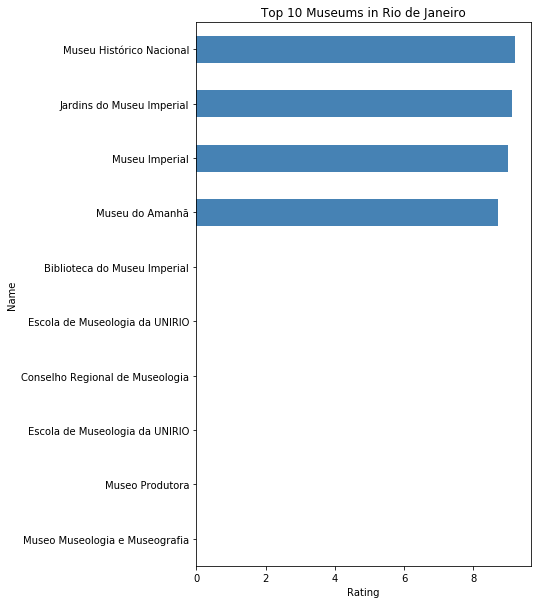

In [71]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Rio_Museos_L.drop(['Museo_Id_Rio', 'Museo_Rio', 'Museo_Address_Rio', 'Museo_Rio_Lat', 'Museo_Rio_Long','Museo_city_Rio'], axis=1, inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()
# Rename some of the columns so that they make sense.

df_Rio_Museos_L.rename(columns={'Museo_name_Rio':'Name', 'Museo_Latitude_Rio':'Latitude','Museo_Longitude_Rio':'Longitude','Museo_Category_Rio':'Category',
                       'Museum_Venue_id_Rio':'id','Rating':'Rating'}, inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Rio_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Rio_Museos_L.set_index('Name', inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()


#\\ # sort dataframe on 'Rating' column (descending)
df_Rio_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Rio_Museos_L['Rating'].tail(10)
df_top10
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Rio de Janeiro')
#-->

plt.show()

# Let's check how many Museum were returned for each category


In [72]:
df_Rio_Museos_L.groupby('Name').count()
# Analyze Each Museum

# one hot encoding
MuseoRio_onehot = pd.get_dummies(df_Rio_Museos_L[['Category']], prefix="", prefix_sep="")


# move name column to the first column
fixed_columns = [MuseoRio_onehot.columns[-1]] + list(MuseoRio_onehot.columns[:-1])
MuseoRio_onehot = MuseoRio_onehot[fixed_columns]

MuseoRio_onehot.head()
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoRio_grouped = MuseoRio_onehot.groupby('Name').mean().reset_index()
MuseoRio_grouped
# Let's confirm the new size
MuseoRio_grouped.shape

Museos_Rio_Top = MuseoRio_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Rio_Top.shape)
Museos_Rio_Top.head(1)
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Now let's create the new dataframe and display the top 10 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Rio_Top['Name']

for ind in np.arange(Museos_Rio_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Rio_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

Shape:  (10, 9)


Name      1st Most Common Venue  \
0     Biblioteca do Museu Imperial                    Library   
1  Conselho Regional de Museologia                     Office   
2   Escola de Museologia da UNIRIO  College Academic Building   
3        Jardins do Museu Imperial                     Garden   
4                            Museo        Housing Development   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Office   Housing Development        History Museum   
1               Library   Housing Development        History Museum   
2                Office               Library   Housing Development   
3                Office               Library   Housing Development   
4                Office               Library        History Museum   

  5th Most Common Venue  
0                Garden  
1                Garden  
2        History Museum  
3        History Museum  
4                Garden

# Cluster Museums

In [73]:


#-->



# Run k-means to cluster the museum into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Rio_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Rio_Museos

# merge Museum_grouped with latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Rio')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!

# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Rio'], Museum_merged['Museo_Longitude_Rio'], Museum_merged['Museo_name_Rio'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [75]:
#Examine Clusters

#Clustrier 1

Museum_merged.loc[Museum_merged['Cluster Labels'] == 0, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Rio                  Museo_name_Rio  \
0                             Museo                           Museo   
4    Museo Museologia e Museografia                           Museo   
8                   Museo Produtora                           Museo   
9                   Museu do Amanhã                 Museu do Amanhã   
12         Museu Histórico Nacional                 Museu do Amanhã   
13   Escola de Museologia da UNIRIO  Escola de Museologia da UNIRIO   
16  Conselho Regional de Museologia  Escola de Museologia da UNIRIO   
17  Conselho Regional de Museologia  Escola de Museologia da UNIRIO   
18   Escola de Museologia da UNIRIO  Escola de Museologia da UNIRIO   
21                   Museu Imperial       Jardins do Museu Imperial   
25     Biblioteca do Museu Imperial       Jardins do Museu Imperial   
26        Jardins do Museu Imperial       Jardins do Museu Imperial   

    Museo_city_Rio                                  Museo_Address_Rio  \
0                                                            [Brasil]   
4                                                            [Brasil]   
8                                                            [Brasil]   
9   Rio de Janeiro  [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...   
12  Rio de Janeiro  [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...   
13                                  [Av. Pasteur, 458 - Urca, Brasil]   
16                                  [Av. Pasteur, 458 - Urca, Brasil]   
17                                  [Av. Pasteur, 458 - Urca, Brasil]   
18                                  [Av. Pasteur, 458 - Urca, Brasil]   
21      Petrópolis  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   
25      Petrópolis  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   
26      Petrópolis  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   

                                    Museo_Address_Rio  Museo_Latitude_Rio  \
0                                            [Brasil]          -22.970362   
4                                            [Brasil]          -22.970362   
8                                            [Brasil]          -22.970362   
9   [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...          -22.895122   
12  [Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...          -22.895122   
13                  [Av. Pasteur, 458 - Urca, Brasil]          -22.928341   
16                  [Av. Pasteur, 458 - Urca, Brasil]          -22.955028   
17                  [Av. Pasteur, 458 - Urca, Brasil]          -22.928341   
18                  [Av. Pasteur, 458 - Urca, Brasil]          -22.955028   
21  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507963   
25  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507963   
26  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507963   

    Museo_Longitude_Rio         Museo_Category_Rio       Museum_Venue_id_Rio  \
0            -43.185856        Housing Development  4ff3896be4b0734a79205c9b   
4            -43.185856        Housing Development  4ff3896be4b0734a79205c9b   
8            -43.185856        Housing Development  4ff3896be4b0734a79205c9b   
9            -43.179855             Science Museum  56741ea6498e999035b89e4c   
12           -43.179855             Science Museum  56741ea6498e999035b89e4c   
13           -43.176573  College Academic Building  50fd380ce4b052c5a6d59894   
16           -43.169363  College Academic Building  50fd3933e4b04cfffe5df954   
17           -43.176573  College Academic Building  50fd380ce4b052c5a6d59894   
18           -43.169363  College Academic Building  50fd3933e4b04cfffe5df954   
21           -43.175821                     Garden  50747301e4b035a218bf9b8f   
25           -43.175821                     Garden  50747301e4b035a218bf9b8f   
26           -43.175821                     Garden  50747301e4b035a218bf9b8f   

    Cluster Labels      1st Most Common Venue 2nd Most Common Venue  \
0                0        Housing Deve

In [76]:
#Examine Clusters

#Clustrier 2

Museum_merged.loc[Museum_merged['Cluster Labels'] == 1, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Rio                Museo_name_Rio Museo_city_Rio  \
22                Museu Imperial  Biblioteca do Museu Imperial     Petrópolis   
23  Biblioteca do Museu Imperial  Biblioteca do Museu Imperial     Petrópolis   
28     Jardins do Museu Imperial  Biblioteca do Museu Imperial     Petrópolis   

                                    Museo_Address_Rio  \
22  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   
23  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   
28  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...   

                                    Museo_Address_Rio  Museo_Latitude_Rio  \
22  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507681   
23  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507681   
28  [Museu Imperial, Petrópolis, RJ, 25610-320, Br...          -22.507681   

    Museo_Longitude_Rio Museo_Category_Rio       Museum_Venue_id_Rio  \
22           -43.174805            Library  5c9e04abf1936e002c9758cf   
23           -43.174805            Library  5c9e04abf1936e002c9758cf   
28           -43.174805            Library  5c9e04abf1936e002c9758cf   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22               1               Library                Office   
23               1               Library                Office   
28               1               Library                Office   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
22   Housing Development        History Museum                Garden  
23   Housing Development        History Museum                Garden  
28   Housing Development        History Museum                Garden

In [77]:
#Examine Clusters

#Clustrier 3

Museum_merged.loc[Museum_merged['Cluster Labels'] == 2, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Rio            Museo_name_Rio  Museo_city_Rio  \
10               Museu do Amanhã  Museu Histórico Nacional  Rio de Janeiro   
11      Museu Histórico Nacional  Museu Histórico Nacional  Rio de Janeiro   
20                Museu Imperial            Museu Imperial      Petrópolis   
24  Biblioteca do Museu Imperial            Museu Imperial      Petrópolis   
27     Jardins do Museu Imperial            Museu Imperial      Petrópolis   

                                    Museo_Address_Rio  \
10  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...   
11  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...   
20  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...   
24  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...   
27  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...   

                                    Museo_Address_Rio  Museo_Latitude_Rio  \
10  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...          -22.905739   
11  [Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...          -22.905739   
20  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...          -22.507829   
24  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...          -22.507829   
27  [R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...          -22.507829   

    Museo_Longitude_Rio Museo_Category_Rio       Museum_Venue_id_Rio  \
10           -43.169167     History Museum  4b058724f964a520f08122e3   
11           -43.169167     History Museum  4b058724f964a520f08122e3   
20           -43.175868     History Museum  4b9bf41ef964a520013a36e3   
24           -43.175868     History Museum  4b9bf41ef964a520013a36e3   
27           -43.175868     History Museum  4b9bf41ef964a520013a36e3   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
10               2        History Museum                Office   
11               2        History Museum                Office   
20               2        History Museum                Office   
24               2        History Museum                Office   
27               2        History Museum                Office   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
10               Library   Housing Development                Garden  
11               Library   Housing Development                Garden  
20               Library   Housing Development                Garden  
24               Library   Housing Development                Garden  
27               Library   Housing Development                Garden

In [78]:
#Examine Clusters

#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 3, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Rio                   Museo_name_Rio  \
1                             Museo   Museo Museologia e Museografia   
3    Museo Museologia e Museografia   Museo Museologia e Museografia   
7                   Museo Produtora   Museo Museologia e Museografia   
14   Escola de Museologia da UNIRIO  Conselho Regional de Museologia   
15  Conselho Regional de Museologia  Conselho Regional de Museologia   
19   Escola de Museologia da UNIRIO  Conselho Regional de Museologia   

    Museo_city_Rio                                  Museo_Address_Rio  \
1                                                            [Brasil]   
3                                                            [Brasil]   
7                                                            [Brasil]   
14  Rio de Janeiro  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...   
15  Rio de Janeiro  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...   
19  Rio de Janeiro  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...   

                                    Museo_Address_Rio  Museo_Latitude_Rio  \
1                                            [Brasil]          -22.975374   
3                                            [Brasil]          -22.975374   
7                                            [Brasil]          -22.975374   
14  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...          -22.945263   
15  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...          -22.945263   
19  [Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...          -22.945263   

    Museo_Longitude_Rio Museo_Category_Rio       Museum_Venue_id_Rio  \
1            -43.189755             Office  4d7a3abfceaa224bf8810671   
3            -43.189755             Office  4d7a3abfceaa224bf8810671   
7            -43.189755             Office  4d7a3abfceaa224bf8810671   
14           -43.188093             Office  543d2a3f498e48b8d46dcc23   
15           -43.188093             Office  543d2a3f498e48b8d46dcc23   
19           -43.188093             Office  543d2a3f498e48b8d46dcc23   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                3                Office               Library   
3                3                Office               Library   
7                3                Office               Library   
14               3                Office               Library   
15               3                Office               Library   
19               3                Office               Library   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
1    Housing Development        History Museum                Garden  
3    Housing Development        History Museum                Garden  
7    Housing Development        History Museum                Garden  
14   Housing Development        History Museum                Garden  
15   Housing Development        History Museum                Garden  
19   Housing Development        History Museum                Garden

In [79]:
#Examine Clusters

#Clustrier 5

Museum_merged.loc[Museum_merged['Cluster Labels'] == 4, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Rio   Museo_name_Rio  Museo_city_Rio  \
2                           Museo  Museo Produtora  Rio de Janeiro   
5  Museo Museologia e Museografia  Museo Produtora  Rio de Janeiro   
6                 Museo Produtora  Museo Produtora  Rio de Janeiro   

                             Museo_Address_Rio  \
2  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]   
5  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]   
6  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]   

                             Museo_Address_Rio  Museo_Latitude_Rio  \
2  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]          -22.984724   
5  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]          -22.984724   
6  [Rua Alice 209, Rio de Janeiro, RJ, Brasil]          -22.984724   

   Museo_Longitude_Rio Museo_Category_Rio       Museum_Venue_id_Rio  \
2           -43.193185    Coworking Space  51d5f9c6498ec155371737d9   
5           -43.193185    Coworking Space  51d5f9c6498ec155371737d9   
6           -43.193185    Coworking Space  51d5f9c6498ec155371737d9   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2               4       Coworking Space                Office   
5               4       Coworking Space                Office   
6               4       Coworking Space                Office   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
2               Library   Housing Development        History Museum  
5               Library   Housing Development        History Museum  
6               Library   Housing Development        History Museum

# 

# Buenos Aires - Argentina

In [83]:
# So let's start by converting the Rio de Janeiro - Brasil address to its latitude and longitude coordinates.
CLIENT_ID = 'Y5QSJAMHKFFENZTG1UD5RFQ5T5Q12DMML1VFMO1J4JKIQJSM' # your Foursquare ID
CLIENT_SECRET = 'UKAKLV4RIELRBUHWYDKRYTQH5VO2LIO3YS2TNTK124HDNMED' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

address = 'Buenos Aires, Argentina'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-34.6075682 -58.4370894
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=Y5QSJAMHKFFENZTG1UD5RFQ5T5Q12DMML1VFMO1J4JKIQJSM&client_secret=UKAKLV4RIELRBUHWYDKRYTQH5VO2LIO3YS2TNTK124HDNMED&ll=-34.6075682,-58.4370894&v=20180604&query=Museo&radius=900000&limit=30'

In [84]:
# Send the GET Request and examine the results

results3 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues3 = results3['response']['venues']


# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Air = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues3:
    Ids_Air = data['id'] 
    museo_Air = data['name'] 
        
    location_lat_Air = data['location']['lat']
    location_lng_Air = data['location']['lng']
 
    location_Add_Air = data['location']['formattedAddress']    
    location_address_Air = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Air = Museos_Air.append({'Museo':museo_Air,
                            'Id':Ids_Air,
                            'Address': location_address_Air,
                            'Latitude': location_lat_Air,
                            'Longitude': location_lng_Air}, ignore_index=True)

print("Shape: ", Museos_Air.shape)

Shape:  (30, 5)


In [85]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Air_Museos = pd.DataFrame(columns = ['Museo_Id_Air', 'Museo_Air', 'Museo_Address_Air', 'Museo_Air_Lat', 'Museo_Air_Long','Museo_name_Air', 
                                        'Museo_city_Air', 'Museo_Address_Air', 'Museo_Latitude_Air', 'Museo_Longitude_Air', 'Museo_Category_Air',
                                       'Museum_Venue_id_Air'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the Museum in BUenos Aires
for index, row in Museos_Air.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name 
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results3 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results3['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name_Air = results3['response']['venues'][i]['name']
        
        try:
            Museum_city_Air = results3['response']['venues'][i]['location']['city']
        except:
            Museum_city_Air = ''
            
        Museum_address_Air = results3['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Air = results3['response']['venues'][i]['location']['lat']
        Museum_longitude_Air = results3['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Air = results3['response']['venues'][i]['id']
        
  # Check to see if the museum has any categories
        if (len(results3['response']['venues'][i]['categories']) > 0):
            Museum_category_Air = results3['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Air = ''
        
        # Add the data row to the Museum dataframe
        df_Air_Museos = df_Air_Museos.append({'Museo_Id_Air' : Id,
                                              'Museo_Air' : Museo, 
                                              'Museo_Address_Air' : Museo_Add, 
                                              'Museo_Air_Lat' : LATITUDE, 
                                              'Museo_Air_Long' : LONGITUDE,  
                                              'Museo_name_Air' : Museum_name_Air,
                                              'Museo_city_Air' : Museum_city_Air, 
                                              'Museo_Address_Air' : Museum_address_Air,
                                              'Museo_Latitude_Air' : Museum_latitude_Air,
                                              'Museo_Longitude_Air' : Museum_longitude_Air, 
                                              'Museo_Category_Air' : Museum_category_Air,
                                               'Museum_Venue_id_Air' : Museum_Venue_id_Air}, ignore_index=True)

# Print the first  rows of the Museum dataframe
df_Air_Museos.head(1)

# create a copy of the restaurants dataframe for storing the new list without the duplicate museums
df_Air_Museos_L = df_Air_Museos.drop_duplicates(subset='Museum_Venue_id_Air', keep='first', inplace=False)
print (df_Air_Museos_L.shape)
df_Air_Museos_L.head(10)

(106, 12)


Museo_Id_Air  \
0   4b05871af964a520de7f22e3   
1   4b05871af964a520de7f22e3   
2   4b05871af964a520de7f22e3   
6   51681520e4b05224c5b8b4e5   
7   51681520e4b05224c5b8b4e5   
8   5359688f498e19044f52d1b9   
9   5359688f498e19044f52d1b9   
10  5359688f498e19044f52d1b9   
11  5359688f498e19044f52d1b9   
12  5359688f498e19044f52d1b9   

                                            Museo_Air  \
0   Museo Argentino de Ciencias Naturales "Bernard...   
1   Museo Argentino de Ciencias Naturales "Bernard...   
2   Museo Argentino de Ciencias Naturales "Bernard...   
6                   Museo de Esculturas Luis Perlotti   
7                   Museo de Esculturas Luis Perlotti   
8                         Museo Casa de Ricardo Rojas   
9                         Museo Casa de Ricardo Rojas   
10                        Museo Casa de Ricardo Rojas   
11                        Museo Casa de Ricardo Rojas   
12                        Museo Casa de Ricardo Rojas   

                                    Museo_Address_Air  Museo_Air_Lat  \
0   [Parque Centenario, C1405DJR Buenos Aires, Bue...     -34.605458   
1   [Pujol 644 (e/ Méndez de Andes y Felipe Valles...     -34.605458   
2   [Humahuaca 4662 (e/ Avenida Estado de Israel y...     -34.605458   
6   [Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...     -34.615083   
7        [Buenos Aires, Buenos Aires C.F., Argentina]     -34.615083   
8   [Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...     -34.593529   
9   [Laprida 1212 (esq. Gral. Lucio Norberto Mansi...     -34.593529   
10  [Facultad de Medicina (UBA) (4° Piso), Buenos ...     -34.593529   
11  [Vicente López 2220 (entre Azcuénaga y Av. Pue...     -34.593529   
12  [Av. del Libertador 1902 (esq. Pereyra Lucena)...     -34.593529   

    Museo_Air_Long                                     Museo_name_Air  \
0       -58.438039  Museo Argentino de Ciencias Naturales "Bernard...   
1       -58.438039                  Museo de Esculturas Luis Perlotti   
2       -58.438039                                       Museo Kosice   
6       -58.448306  Esc. Primaria Comun N° 01 Museo de Bellas Arte...   
7       -58.448306                                             Flores   
8       -58.407265                        Museo Casa de Ricardo Rojas   
9       -58.407265                                    Museo Xul Solar   
10      -58.407265                                 Museo de Patología   
11      -58.407265                                         Museo Roca   
12      -58.407265           Museo Nacional de Arte Decorativo (MNAD)   

   Museo_city_Air                                  Museo_Address_Air  \
0    Buenos Aires  [Parque Centenario, C1405DJR Buenos Aires, Bue...   
1    Buenos Aires  [Pujol 644 (e/ Méndez de Andes y Felipe Valles...   
2    Buenos Aires  [Humahuaca 4662 (e/ Avenida Estado de Israel y...   
6    Buenos Aires  [Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...   
7    Buenos Aires       [Buenos Aires, Buenos Aires C.F., Argentina]   
8    Buenos Aires  [Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...   
9    Buenos Aires  [Laprida 1212 (esq. Gral. Lucio Norberto Mansi...   
10   Buenos Aires  [Facultad de Medicina (UBA) (4° Piso), Buenos ...   
11   Buenos Aires  [Vicente López 2220 (entre Azcuénaga y Av. Pue...   
12   Buenos Aires  [Av. del Libertador 1902 (esq. Pereyra Lucena)...   

    Museo_Latitude_Air  Museo_Longitude_Air Museo_Category_Air  \
0           -34.605458           -58.438039     Science Museum   
1           -34.615083           -58.448306         Art Museum   
2           -34.601000           -58.430614         Art Museum   
6           -34.627593           -58.462645             School   
7           -34.628129           -58.462863       Neighborhood   
8           -34.593529           -58.407265     History Museum   
9           -34.594703           -58.407793             Museum   
10          -34.598783           -58.400013     Science Museum   
11          -34.587858           -58.395684     His

# Museum Ratings from Foursquare

In [86]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Air_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the restaurants dataframe
    df_Air_Museos_L.loc[index, 'Rating'] = rating

df_Air_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Museo_Id_Air  \
0  4b05871af964a520de7f22e3   
1  4b05871af964a520de7f22e3   

                                           Museo_Air  \
0  Museo Argentino de Ciencias Naturales "Bernard...   
1  Museo Argentino de Ciencias Naturales "Bernard...   

                                   Museo_Address_Air  Museo_Air_Lat  \
0  [Parque Centenario, C1405DJR Buenos Aires, Bue...     -34.605458   
1  [Pujol 644 (e/ Méndez de Andes y Felipe Valles...     -34.605458   

   Museo_Air_Long                                     Museo_name_Air  \
0      -58.438039  Museo Argentino de Ciencias Naturales "Bernard...   
1      -58.438039                  Museo de Esculturas Luis Perlotti   

  Museo_city_Air                                  Museo_Address_Air  \
0   Buenos Aires  [Parque Centenario, C1405DJR Buenos Aires, Bue...   
1   Buenos Aires  [Pujol 644 (e/ Méndez de Andes y Felipe Valles...   

   Museo_Latitude_Air  Museo_Longitude_Air Museo_Category_Air  \
0          -34.605458           -58.438039     Science Museum   
1          -34.615083           -58.448306         Art Museum   

        Museum_Venue_id_Air  Rating  
0  4b05871af964a520de7f22e3     0.0  
1  51681520e4b05224c5b8b4e5     0.0

# Barh Clasification

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


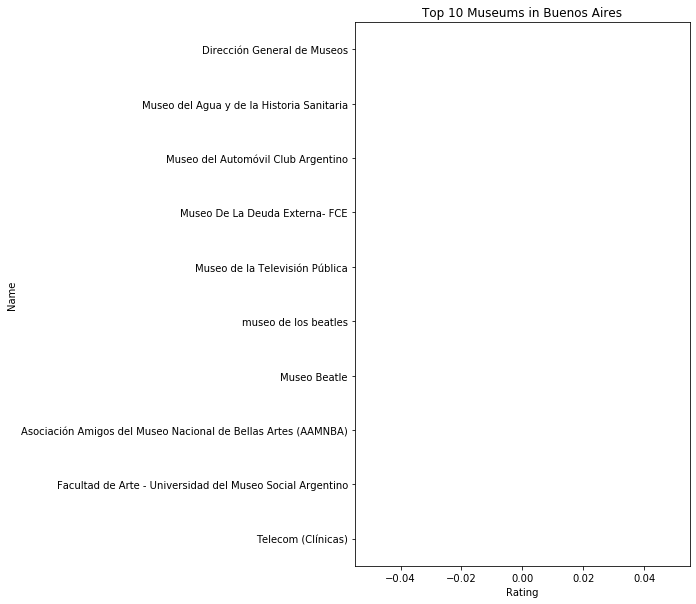

In [87]:

# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Air_Museos_L.drop(['Museo_Id_Air', 'Museo_Air', 'Museo_Address_Air', 'Museo_Air_Lat', 'Museo_Air_Long','Museo_city_Air'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Air_Museos_L.head()

# Rename some of the columns so that they make sense.

df_Air_Museos_L.rename(columns={'Museo_name_Air':'Name', 'Museo_Latitude_Air':'Latitude','Museo_Longitude_Air':'Longitude','Museo_Category_Air':'Category',
                       'Museum_Venue_id_Air':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Air_Museos_L.head()
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Air_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Air_Museos_L.set_index('Name', inplace=True)

# let's view the first element and see how the dataframe was changed
df_Air_Museos_L.head()


#\\ # sort dataframe on 'Rating' column (descending)
df_Air_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Air_Museos_L['Rating'].tail(10)
df_top10
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Buenos Aires')
#-->

plt.show()

# Let's check how many Museum were returned for each category

In [88]:

df_Air_Museos_L.groupby('Name').count()
# Analyze Each Museum

# one hot encoding
MuseoAir_onehot = pd.get_dummies(df_Air_Museos_L[['Category']], prefix="", prefix_sep="")


# move neighborhood column to the first column
fixed_columns = [MuseoAir_onehot.columns[-1]] + list(MuseoAir_onehot.columns[:-1])
MuseoAir_onehot = MuseoAir_onehot[fixed_columns]

MuseoAir_onehot.head()
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoAir_grouped = MuseoAir_onehot.groupby('Name').mean().reset_index()
MuseoAir_grouped
# Let's confirm the new size
MuseoAir_grouped.shape

Museos_Air_Top = MuseoAir_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Air_Top.shape)
Museos_Air_Top.head(1)
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Now let's create the new dataframe and display the top 10 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Air_Top['Name']

for ind in np.arange(Museos_Air_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Air_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()


Shape:  (105, 32)


Name 1st Most Common Venue  \
0  Archivo y Museo Históricos del Banco de la Pro...        History Museum   
1  Asociación Amigos del Museo Nacional de Bellas...            Non-Profit   
2                            Av. Cabildo y Juramento          Intersection   
3             AySA - Palacio de las Aguas Corrientes   Monument / Landmark   
4  Bar Del Filete, Museo De La Ciudad de Buenos A...        History Museum   

  2nd Most Common Venue   3rd Most Common Venue   4th Most Common Venue  \
0    Spanish Restaurant  Argentinian Restaurant             Art Gallery   
1    Spanish Restaurant          History Museum  Argentinian Restaurant   
2    Spanish Restaurant          History Museum  Argentinian Restaurant   
3    Spanish Restaurant          History Museum  Argentinian Restaurant   
4    Spanish Restaurant  Argentinian Restaurant             Art Gallery   

  5th Most Common Venue  
0            Art Museum  
1           Art Gallery  
2           Art Gallery  
3           Art Gallery  
4            Art Museum

# Cluster Museums

In [89]:

#-->



# Run k-means to cluster the museums into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Air_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Air_Museos

# merge museums_grouped with  latitude/longitude for each museum
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Air')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!

# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Air'], Museum_merged['Museo_Longitude_Air'], Museum_merged['Museo_name_Air'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [90]:
#Examine Clusters

#Clustrier 1

Museum_merged.loc[Museum_merged['Cluster Labels'] == 0, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Air  \
8                       Museo Casa de Ricardo Rojas   
11                      Museo Casa de Ricardo Rojas   
13                      Museo Casa de Ricardo Rojas   
16                      Museo Casa de Ricardo Rojas   
21                      Museo Casa de Ricardo Rojas   
...                                             ...   
1018  Universidad del Museo Social Argentino (UMSA)   
1019  Universidad del Museo Social Argentino (UMSA)   
1021  Universidad del Museo Social Argentino (UMSA)   
1022  Universidad del Museo Social Argentino (UMSA)   
1023  Universidad del Museo Social Argentino (UMSA)   

                              Museo_name_Air          Museo_city_Air  \
8                Museo Casa de Ricardo Rojas            Buenos Aires   
11                                Museo Roca            Buenos Aires   
13                               Museo Evita            Buenos Aires   
16    Museo del Holocausto-Shoá Buenos Aires            Buenos Aires   
21                        Museo del Audífono            Buenos Aires   
...                                      ...                     ...   
1018                            Museo Borges  Ciudad de Buenos Aires   
1019                      Museo de la Ciudad            Buenos Aires   
1021           Museo Histórico y Numismático            Buenos Aires   
1022                       Museo Casa Rosada            Buenos Aires   
1023                              Museo AFIP               Monserrat   

                                      Museo_Address_Air  \
8     [Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...   
11    [Vicente López 2220 (entre Azcuénaga y Av. Pue...   
13    [Lafinur 2988 (esq. J. M. Gutiérrez), 1425 Bue...   
16    [Montevideo 919 (esq. Paraguay), C1019ABS Buen...   
21    [Tte. Gral Juan Domingo Perón 1647 (e/ Rodrígu...   
...                                                 ...   
1018  [Tomás de Anchorena 1660 (e/ Juncal y Beruti),...   
1019  [Defensa 223 (e/ Adolfo Alsina y Moreno), C106...   
1021  [Banco de la Nación Argentina, C1002AAF Buenos...   
1022  [Avenida Paseo Colón 100 (esq. Hipólito Yrigoy...   
1023  [Defensa 190 (Alsina), Monserrat, Buenos Aires...   

                                      Museo_Address_Air  Museo_Latitude_Air  \
8     [Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...          -34.593529   
11    [Vicente López 2220 (entre Azcuénaga y Av. Pue...          -34.587858   
13    [Lafinur 2988 (esq. J. M. Gutiérrez), 1425 Bue...          -34.580689   
16    [Montevideo 919 (esq. Paraguay), C1019ABS Buen...          -34.598147   
21    [Tte. Gral Juan Domingo Perón 1647 (e/ Rodrígu...          -34.606703   
...                                                 ...                 ...   
1018  [Tomás de Anchorena 1660 (e/ Juncal y Beruti),...          -34.591371   
1019  [Defensa 223 (e/ Adolfo Alsina y Moreno), C106...          -34.610113   
1021  [Banco de la Nación Argentina, C1002AAF Buenos...          -34.607790   
1022  [Avenida Paseo Colón 100 (esq. Hipólito Yrigoy...          -34.608411   
1023  [Defensa 190 (Alsina), Monserrat, Buenos Aires...          -34.610202   

      Museo_Longitude_Air Museo_Category_Air       Museum_Venue_id_Air  \
8              -58.407265     History Museum  5359688f498e19044f52d1b9   
11             -58.395684     History Museum  518d3b48498ea74f863727a6   
13             -58.414731     History Museum  4b05871af964a520e07f22e3   
16             -58.389669     History Museum  4c8e9340d2aea0934880cf69   
21             -58.390017     History Museum  546833cc498e64b49d758ed5   
...                   ...                ...                       ...   
1018           -58.402762     History Museum  527ed9d7498e42a7dd0d36da   
1019           -58.372074     History Museum  4b05871af964a520e97f22e3   
1021           -58.371339     History Museum  5dbe1ec1363a3500070dd815   
1022           -58.369589     History Museum  5773e82f498e4811c1f22052   
1023           -58.371749     History Museum

In [91]:
#Examine Clusters

#Clustrier 2

Museum_merged.loc[Museum_merged['Cluster Labels'] ==1 , Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Air  \
1     Museo Argentino de Ciencias Naturales "Bernard...   
2     Museo Argentino de Ciencias Naturales "Bernard...   
3                     Museo de Esculturas Luis Perlotti   
5                     Museo de Esculturas Luis Perlotti   
12                          Museo Casa de Ricardo Rojas   
...                                                 ...   
953               Museo de Arquitectura y Diseño (MARQ)   
954               Museo de Arquitectura y Diseño (MARQ)   
981       Universidad del Museo Social Argentino (UMSA)   
997       Universidad del Museo Social Argentino (UMSA)   
1025      Universidad del Museo Social Argentino (UMSA)   

                                         Museo_name_Air Museo_city_Air  \
1                     Museo de Esculturas Luis Perlotti   Buenos Aires   
2                                          Museo Kosice   Buenos Aires   
3                     Museo de Esculturas Luis Perlotti   Buenos Aires   
5                                          Museo Kosice   Buenos Aires   
12             Museo Nacional de Arte Decorativo (MNAD)   Buenos Aires   
...                                                 ...            ...   
953   Museo de Arte Latinoamericano de Buenos Aires ...   Buenos Aires   
954                Museo de Arte Popular José Hernández   Buenos Aires   
981   Museo de Arte Hispanoamericano Isaac Fernández...   Buenos Aires   
997   Museo de Arte Hispanoamericano Isaac Fernández...   Buenos Aires   
1025                             Museo de la Caricatura                  

                                      Museo_Address_Air  \
1     [Pujol 644 (e/ Méndez de Andes y Felipe Valles...   
2     [Humahuaca 4662 (e/ Avenida Estado de Israel y...   
3     [Pujol 644 (e/ Méndez de Andes y Felipe Valles...   
5     [Humahuaca 4662 (e/ Avenida Estado de Israel y...   
12    [Av. del Libertador 1902 (esq. Pereyra Lucena)...   
...                                                 ...   
953   [Av. Figueroa Alcorta 3415 (e/ Jerónimo Salgue...   
954   [Avenida del Libertador 2373 (esq. Av. Cnel. D...   
981   [Hipólito Yrigoyen 1420 (entre San José y Pres...   
997   [Suipacha 1422 (entre Av. del Libertador y Arr...   
1025                             [Lima 1037, Argentina]   

                                      Museo_Address_Air  Museo_Latitude_Air  \
1     [Pujol 644 (e/ Méndez de Andes y Felipe Valles...          -34.615083   
2     [Humahuaca 4662 (e/ Avenida Estado de Israel y...          -34.601000   
3     [Pujol 644 (e/ Méndez de Andes y Felipe Valles...          -34.615083   
5     [Humahuaca 4662 (e/ Avenida Estado de Israel y...          -34.601000   
12    [Av. del Libertador 1902 (esq. Pereyra Lucena)...          -34.582668   
...                                                 ...                 ...   
953   [Av. Figueroa Alcorta 3415 (e/ Jerónimo Salgue...          -34.577051   
954   [Avenida del Libertador 2373 (esq. Av. Cnel. D...          -34.579512   
981   [Hipólito Yrigoyen 1420 (entre San José y Pres...          -34.610063   
997   [Suipacha 1422 (entre Av. del Libertador y Arr...          -34.590759   
1025                             [Lima 1037, Argentina]          -34.620201   

      Museo_Longitude_Air Museo_Category_Air       Museum_Venue_id_Air  \
1              -58.448306         Art Museum  51681520e4b05224c5b8b4e5   
2              -58.430614         Art Museum  59ffecb8f870fd480c06df94   
3              -58.448306         Art Museum  51681520e4b05224c5b8b4e5   
5              -58.430614         Art Museum  59ffecb8f870fd480c06df94   
12             -58.400644         Art Museum  4b1aaf7cf964a5205eef23e3   
...                   ...                ...                       ...   
953            -58.403826         Art Museum  4b37a2dbf964a520684325e3   
954            -58.404988         Art Museum  4b05871af964a520cf7f22e3   
981            -58.386646         Art Museum  5366a6cf498e0d4ed6a02d96   
997            -58.380054         Art Museum  4b70

In [92]:
#Examine Clusters

#Clustrier 3

Museum_merged.loc[Museum_merged['Cluster Labels'] == 2, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Air  \
6                 Museo de Esculturas Luis Perlotti   
7                 Museo de Esculturas Luis Perlotti   
17                      Museo Casa de Ricardo Rojas   
19                      Museo Casa de Ricardo Rojas   
23                      Museo Casa de Ricardo Rojas   
...                                             ...   
988   Universidad del Museo Social Argentino (UMSA)   
1002  Universidad del Museo Social Argentino (UMSA)   
1003  Universidad del Museo Social Argentino (UMSA)   
1006  Universidad del Museo Social Argentino (UMSA)   
1024  Universidad del Museo Social Argentino (UMSA)   

                                         Museo_name_Air Museo_city_Air  \
6     Esc. Primaria Comun N° 01 Museo de Bellas Arte...   Buenos Aires   
7                                                Flores   Buenos Aires   
17                         Museo Evita Restaurant & Bar   Buenos Aires   
19         Muestra “El museo de los mundos imaginarios”   Buenos Aires   
23        Universidad del Museo Social Argentino (UMSA)   Buenos Aires   
...                                                 ...            ...   
988                                museo de los beatles                  
1002       Muestra “El museo de los mundos imaginarios”   Buenos Aires   
1003  Facultad de Arte - Universidad del Museo Socia...                  
1006                     Museo De La Deuda Externa- FCE                  
1024                                   Museo del Filete   Buenos Aires   

                                      Museo_Address_Air  \
6     [Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...   
7          [Buenos Aires, Buenos Aires C.F., Argentina]   
17    [J. M. Gutierrez 3926 (e/ Lafinur y República ...   
19    [Centro Cultural Recoleta, C1113AAX Buenos Air...   
23    [Av. Corrientes 1723 (e/ Av. Callao y Rodrígue...   
...                                                 ...   
988                                         [Argentina]   
1002  [Centro Cultural Recoleta, C1113AAX Buenos Air...   
1003                                        [Argentina]   
1006                                        [Argentina]   
1024  [Defensa 217 (e/ Adolfo Alsina y Moreno), Buen...   

                                      Museo_Address_Air  Museo_Latitude_Air  \
6     [Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...          -34.627593   
7          [Buenos Aires, Buenos Aires C.F., Argentina]          -34.628129   
17    [J. M. Gutierrez 3926 (e/ Lafinur y República ...          -34.580502   
19    [Centro Cultural Recoleta, C1113AAX Buenos Air...          -34.586240   
23    [Av. Corrientes 1723 (e/ Av. Callao y Rodrígue...          -34.604299   
...                                                 ...                 ...   
988                                         [Argentina]          -34.604196   
1002  [Centro Cultural Recoleta, C1113AAX Buenos Air...          -34.586240   
1003                                        [Argentina]          -34.605226   
1006                                        [Argentina]          -34.599311   
1024  [Defensa 217 (e/ Adolfo Alsina y Moreno), Buen...          -34.610105   

      Museo_Longitude_Air         Museo_Category_Air  \
6              -58.462645                     School   
7              -58.462863               Neighborhood   
17             -58.414846     Argentinian Restaurant   
19             -58.391876                    Exhibit   
23             -58.391388                 University   
...                   ...                        ...   
988            -58.389931                Music Venue   
1002           -58.391876                    Exhibit   
1003           -58.388906  College Academic Building   
1006           -58.391605                 University   
1024           -58.372005     Argentinian Restaurant   

           Museum_Venue_id_Air  Cluster Labels      1st Most Common Venue  \
6     5286979c11d2f30766edbc48               2                     School   
7     4

In [93]:
#Examine Clusters

#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 3, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Air  \
9                       Museo Casa de Ricardo Rojas   
26                      Museo Casa de Ricardo Rojas   
27                      Museo Casa de Ricardo Rojas   
28                      Museo Casa de Ricardo Rojas   
33                      Museo Casa de Ricardo Rojas   
...                                             ...   
1009  Universidad del Museo Social Argentino (UMSA)   
1012  Universidad del Museo Social Argentino (UMSA)   
1014  Universidad del Museo Social Argentino (UMSA)   
1020  Universidad del Museo Social Argentino (UMSA)   
1027  Universidad del Museo Social Argentino (UMSA)   

                      Museo_name_Air Museo_city_Air  \
9                    Museo Xul Solar   Buenos Aires   
26          Museo Casa Carlos Gardel   Buenos Aires   
27             Museo Fármacobotánica                  
28    Museo del Libro y de la Lengua   Buenos Aires   
33    Museo de la Televisión Pública   Buenos Aires   
...                              ...            ...   
1009           Museo Fármacobotánica                  
1012          Museo Botica del Angel   Buenos Aires   
1014        Museo Casa Carlos Gardel   Buenos Aires   
1020               Museo Franciscano   Buenos Aires   
1027  Museo del Libro y de la Lengua   Buenos Aires   

                                      Museo_Address_Air  \
9     [Laprida 1212 (esq. Gral. Lucio Norberto Mansi...   
26    [Jean Jaures 735 (esq. Zelaya), C1215ACM Bueno...   
27                                          [Argentina]   
28    [Av. Gral. Las Heras 2555 (e/ Austria y Agüero...   
33    [Av. Pte. Figueroa Alcorta, Buenos Aires, Buen...   
...                                                 ...   
1009                                        [Argentina]   
1012  [Pte. Luis Saenz Peña 541 (Venezuela), 1110 Bu...   
1014  [Jean Jaures 735 (esq. Zelaya), C1215ACM Bueno...   
1020  [Adolfo Alsina 380 (Defensa), 1087 Buenos Aire...   
1027  [Av. Gral. Las Heras 2555 (e/ Austria y Agüero...   

                                      Museo_Address_Air  Museo_Latitude_Air  \
9     [Laprida 1212 (esq. Gral. Lucio Norberto Mansi...          -34.594703   
26    [Jean Jaures 735 (esq. Zelaya), C1215ACM Bueno...          -34.601711   
27                                          [Argentina]          -34.597862   
28    [Av. Gral. Las Heras 2555 (e/ Austria y Agüero...          -34.585278   
33    [Av. Pte. Figueroa Alcorta, Buenos Aires, Buen...          -34.582082   
...                                                 ...                 ...   
1009                                        [Argentina]          -34.597862   
1012  [Pte. Luis Saenz Peña 541 (Venezuela), 1110 Bu...          -34.615289   
1014  [Jean Jaures 735 (esq. Zelaya), C1215ACM Bueno...          -34.601711   
1020  [Adolfo Alsina 380 (Defensa), 1087 Buenos Aire...          -34.610142   
1027  [Av. Gral. Las Heras 2555 (e/ Austria y Agüero...          -34.585278   

      Museo_Longitude_Air Museo_Category_Air       Museum_Venue_id_Air  \
9              -58.407793             Museum  4b058719f964a520cc7f22e3   
26             -58.407831             Museum  4b05871af964a520eb7f22e3   
27             -58.397697             Museum  581564a938faad3789873b7e   
28             -58.399585             Museum  515e15bde4b0d2e66c055d0e   
33             -58.394943             Museum  5155e722e4b0641ed4c7a4ae   
...                   ...                ...                       ...   
1009           -58.397697             Museum  581564a938faad3789873b7e   
1012           -58.387516             Museum  4e4f21b645ddff0031bc8ac4   
1014           -58.407831             Museum  4b05871af964a520eb7f22e3   
1020           -58.371842             Museum  4c5459d8f5f3d13ae0af02fa   
1027           -58.399585             Museum  515e15bde4b0d2e66c055d0e   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9                  3                Museum    Spanish Restaurant   
26                 3                M

In [94]:
#Examine Clusters

#Clustrier 5

Museum_merged.loc[Museum_merged['Cluster Labels'] == 4, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

Museo_Air  \
0     Museo Argentino de Ciencias Naturales "Bernard...   
4                     Museo de Esculturas Luis Perlotti   
10                          Museo Casa de Ricardo Rojas   
14                          Museo Casa de Ricardo Rojas   
25                          Museo Casa de Ricardo Rojas   
...                                                 ...   
985       Universidad del Museo Social Argentino (UMSA)   
998       Universidad del Museo Social Argentino (UMSA)   
1011      Universidad del Museo Social Argentino (UMSA)   
1015      Universidad del Museo Social Argentino (UMSA)   
1026      Universidad del Museo Social Argentino (UMSA)   

                                         Museo_name_Air   Museo_city_Air  \
0     Museo Argentino de Ciencias Naturales "Bernard...     Buenos Aires   
4     Museo Argentino de Ciencias Naturales "Bernard...     Buenos Aires   
10                                   Museo de Patología     Buenos Aires   
14                      Museo Participativo de Ciencias         Recoleta   
25              Museo de la Psicología Experimental UBA  Capital Federal   
...                                                 ...              ...   
985                                  Museo de Patología     Buenos Aires   
998                     Museo Participativo de Ciencias         Recoleta   
1011            Museo de la Psicología Experimental UBA  Capital Federal   
1015     Museo de Informática de la República Argentina     Buenos Aires   
1026                          Museo de los Niños Abasto     Buenos Aires   

                                      Museo_Address_Air  \
0     [Parque Centenario, C1405DJR Buenos Aires, Bue...   
4     [Parque Centenario, C1405DJR Buenos Aires, Bue...   
10    [Facultad de Medicina (UBA) (4° Piso), Buenos ...   
14    [Junín 1930, C1113AAX Recoleta, Buenos Aires C...   
25    [Uriburu 950 (Paraguay), Capital Federal, Buen...   
...                                                 ...   
985   [Facultad de Medicina (UBA) (4° Piso), Buenos ...   
998   [Junín 1930, C1113AAX Recoleta, Buenos Aires C...   
1011  [Uriburu 950 (Paraguay), Capital Federal, Buen...   
1015  [Marcelo T. De Alvear 740 (e/ Esmeralda y Maip...   
1026  [Abasto Shopping (Nivel 2), C1193AAE Buenos Ai...   

                                      Museo_Address_Air  Museo_Latitude_Air  \
0     [Parque Centenario, C1405DJR Buenos Aires, Bue...          -34.605458   
4     [Parque Centenario, C1405DJR Buenos Aires, Bue...          -34.605458   
10    [Facultad de Medicina (UBA) (4° Piso), Buenos ...          -34.598783   
14    [Junín 1930, C1113AAX Recoleta, Buenos Aires C...          -34.586480   
25    [Uriburu 950 (Paraguay), Capital Federal, Buen...          -34.597686   
...                                                 ...                 ...   
985   [Facultad de Medicina (UBA) (4° Piso), Buenos ...          -34.598783   
998   [Junín 1930, C1113AAX Recoleta, Buenos Aires C...          -34.586480   
1011  [Uriburu 950 (Paraguay), Capital Federal, Buen...          -34.597686   
1015  [Marcelo T. De Alvear 740 (e/ Esmeralda y Maip...          -34.596392   
1026  [Abasto Shopping (Nivel 2), C1193AAE Buenos Ai...          -34.603437   

      Museo_Longitude_Air Museo_Category_Air       Museum_Venue_id_Air  \
0              -58.438039     Science Museum  4b05871af964a520de7f22e3   
4              -58.438039     Science Museum  4b05871af964a520de7f22e3   
10             -58.400013     Science Museum  521bdf5011d2690f53e1feaa   
14             -58.391778     Science Museum  51dd8ccb498effc940ed741b   
25             -58.399018     Science Museum  527e74b811d263d73c24a73c   
...                   ...                ...                       ...   
985            -58.400013     Science Museum  521bdf5011d2690f53e1feaa   
998            -58.391778     Science Museum  51dd8ccb498effc940ed741b   
1011           -58.399018     Science Museum  527e74b811d263d73c24a73c   
1015           -58.377637 